# Cybersecurity in Healthcare

## Introduction

My name is Gurpreet Singh, I currently work in healthcare and therefore wanted to do a project related to my field. I was looking into how Cybersecurity has impacted the healthcare industry and found this data set in regard to cyberattacks that have been reported to U.S. Department of Health and Human Services (HHS) over the time range of 2009 to 2024.  

###### Data source: https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf

### Questions to ask
- What is the occurrence of cybersecurity attacks resulting in data breaches from 2009 to 2024?
- What is the geographic distribution of these cyberattacks?
  - Further analysis of the state with the highest incident of breaches over time
  - Which states contributed to the highest number of individuals affected?
- What is the distribution of the different breach types that occurred from 2009 to 2024?
- How does the incident of each type of breach change over time?
- Are certain breach types more commonly associated with breaches affecting more than 50,000 individuals?
  - What percentage of breaches affect more than 50,000?
- What type of entity was targeted the most?
  - How does the type of breach differ based on Entity Type for each of the categorized data frames?
  - What is the average, median, and total number of individuals affected for each type of entity?
  - What is the comparison of breach frequency and impact between the different entities?
- Which locations are most frequently breached?
  - How does it differ for the various breach size categories?
- Are certain locations of breached information associated with higher number of individuals affected?
- Is there a correlation between individuals affected and breach type?
- Is there a correlation between individuals affected and location of the breach?
- Is there a correlation between individuals affected and a business associate being present?

# Data and Setup

## Importing Required Libraries

In [1773]:
# Import necessary libraries
# For data
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for stats
from scipy.stats import normaltest, ttest_1samp, chi2_contingency, f_oneway, pearsonr
from statsmodels.stats.weightstats import ztest

# adding code to hide warning messages
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [1775]:
# Read the csv file Cybersecurity Breaches set it to a dataframe
# Load datasets
df = pd.read_csv("data/Cybersecurity_Breaches.csv")

In [1776]:
# Displaying the structure of the data
# Check to make sure the data is imported correctly by looking at the first few enteries
display(df.head())  # First few rows

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,"Access Ambulatory Surgery Center, LLC",NH,Healthcare Provider,5205,9/12/2024,Hacking/IT Incident,Network Server,No,NaN
1,"Baker Places, Inc.",CA,Business Associate,971,8/16/2024,Hacking/IT Incident,Email,Yes,"The covered entity (CE), Baker Places, reporte..."
2,Packaging Corporation of America,IL,Health Plan,783,8/15/2024,Hacking/IT Incident,Network Server,Yes,"Packaging Corporation of America, the covered ..."
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,7/10/2024,Unauthorized Access/Disclosure,Email,No,"The covered entity (CE), Janna Pharmacy, repor..."
4,SkinCure Oncology,IL,Business Associate,13434,6/28/2024,Hacking/IT Incident,Email,Yes,"The covered entity (CE), SkinCure Oncology, re..."


In [1777]:
# Make sure to check the last few rows as well to ensure all data is properly included in the analysis
display(df.tail())  # Last few rows

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
6546,Hendry County Hospital Authority d/b/a Hendry ...,FL,Healthcare Provider,49514,10/24/2022,Hacking/IT Incident,Network Server,No,NaN
6547,"Dr. Scott B. Klimaj, DMD",RI,Healthcare Provider,1558,10/21/2022,Hacking/IT Incident,Network Server,No,NaN
6548,"McPherson Hospital, Inc.",KS,Healthcare Provider,19020,9/26/2022,Hacking/IT Incident,Network Server,No,NaN
6549,Apria Healthcare LLC,IN,Healthcare Provider,1868831,5/16/2022,Hacking/IT Incident,Email,No,NaN
6550,Livingston Memorial VNA Health Corporation and...,CA,Healthcare Provider,34775,3/21/2022,Hacking/IT Incident,Network Server,No,NaN


In [1778]:
# Check the data types present in the dataset and compare non-null count across different data categories
print(df.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name of Covered Entity            6551 non-null   object
 1   State                             6531 non-null   object
 2   Covered Entity Type               6551 non-null   object
 3   Individuals Affected              6551 non-null   int64 
 4   Breach Submission Date            6551 non-null   object
 5   Type of Breach                    6551 non-null   object
 6   Location of Breached Information  6551 non-null   object
 7   Business Associate Present        6551 non-null   object
 8   Web Description                   5410 non-null   object
dtypes: int64(1), object(8)
memory usage: 460.7+ KB
None


In [1779]:
# Check for missing values
print(df.isnull().sum())

Name of Covered Entity                 0
State                                 20
Covered Entity Type                    0
Individuals Affected                   0
Breach Submission Date                 0
Type of Breach                         0
Location of Breached Information       0
Business Associate Present             0
Web Description                     1141
dtype: int64


In [1780]:
# Since it can be difficult to manually search through a large dataset, it's easier to use find null values once you know which category they fall under
# Locate rows with null values in the 'State' column
null_states = df[df['State'].isnull()]
print("Rows with null values in 'State':")
display(null_states)

Rows with null values in 'State':


,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
627,Doctors' Center Hospital,NaN,Healthcare Provider,1195220,11/9/2022,Hacking/IT Incident,Network Server,No,NaN
1131,Laboratorio Clinico Toledo,NaN,Healthcare Provider,500,3/14/2022,Hacking/IT Incident,Network Server,No,NaN
1146,Laboratorio Clínico Caparros,NaN,Healthcare Provider,500,3/6/2022,Hacking/IT Incident,Network Server,No,"The covered entity (CE), Laboratorio Clínico C..."
2273,"Servicios de Salud Primarios de Barceloneta, I...",NaN,Healthcare Provider,60200,9/4/2020,Hacking/IT Incident,Email,No,"The covered entity (CE), Servicios de Salud Pr..."
2781,Intramural Practice Plan - Medical Sciences Ca...,NaN,Healthcare Provider,439753,9/16/2019,Hacking/IT Incident,Network Server,No,Intramural Practice Plan - Medical Sciences Ca...
2871,Bayamon Medical Center Corp.,NaN,Healthcare Provider,422496,7/19/2019,Hacking/IT Incident,Network Server,No,"Bayamon Medical Center, the covered entity (CE..."
2872,"Puerto Rico Women And Children's Hospital, LLC",NaN,Healthcare Provider,99943,7/19/2019,Hacking/IT Incident,Network Server,No,"Puerto Rico Women and Children’s Hospital, the..."
2954,Farmacia La Amistad Inc.,NaN,Healthcare Provider,2500,5/24/2019,Hacking/IT Incident,Network Server,No,"Farmacia La Amistad, the covered entity (CE), ..."
2980,Inmediata Health Group,NaN,Healthcare Clearing House,1565338,5/7/2019,Unauthorized Access/Disclosure,Network Server,No,NaN
2990,"Inspira Behavioral Care, Corp",NaN,Healthcare Provider,4246,5/2/2019,Theft,Desktop Computer,No,"Inspira Behavioral Care, Corp., the covered en..."


# Cleaning and Organizing Data

In [1782]:
# Resarching the entities with null 'State" values revealed that they are all located outside of the U.S. therefore they are not relevant to our analysis

# Drop rows where 'State' column has null values
df_cleaned = df.dropna(subset=['State'])

# Check if rows with null 'State' are removed
print(df_cleaned.isnull().sum())  # Verify no nulls in 'State'
print(f"Number of rows after dropping null 'State': {len(df_cleaned)}")

Name of Covered Entity                 0
State                                  0
Covered Entity Type                    0
Individuals Affected                   0
Breach Submission Date                 0
Type of Breach                         0
Location of Breached Information       0
Business Associate Present             0
Web Description                     1132
dtype: int64
Number of rows after dropping null 'State': 6531


In [1783]:
# Similarly we notice that there is a large amount of null values for 'Web Description' another column that we don't need for our analysis

# We can exclude the entire column by dropping it from our dataframe
df_cleaned.drop(columns=['Web Description'], inplace=True)

# Verify the colum is removed by either looking at the first few rows or the last few rows
display(df_cleaned.head())

,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,"Access Ambulatory Surgery Center, LLC",NH,Healthcare Provider,5205,9/12/2024,Hacking/IT Incident,Network Server,No
1,"Baker Places, Inc.",CA,Business Associate,971,8/16/2024,Hacking/IT Incident,Email,Yes
2,Packaging Corporation of America,IL,Health Plan,783,8/15/2024,Hacking/IT Incident,Network Server,Yes
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,7/10/2024,Unauthorized Access/Disclosure,Email,No
4,SkinCure Oncology,IL,Business Associate,13434,6/28/2024,Hacking/IT Incident,Email,Yes


In [1784]:
# To make the data easier to work with we can rename some of the columns

# Rename the specified columns
df_cleaned.rename(
    columns={
        'Name of Covered Entity': 'Entity Name',
        'Covered Entity Type': 'Entity Type',
        'Location of Breached Information': 'Breach Location'
    },
    inplace=True  # Modify the DataFrame in place
)

# Verify the changes
display(df_cleaned.head())

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present
0,"Access Ambulatory Surgery Center, LLC",NH,Healthcare Provider,5205,9/12/2024,Hacking/IT Incident,Network Server,No
1,"Baker Places, Inc.",CA,Business Associate,971,8/16/2024,Hacking/IT Incident,Email,Yes
2,Packaging Corporation of America,IL,Health Plan,783,8/15/2024,Hacking/IT Incident,Network Server,Yes
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,7/10/2024,Unauthorized Access/Disclosure,Email,No
4,SkinCure Oncology,IL,Business Associate,13434,6/28/2024,Hacking/IT Incident,Email,Yes


In [1785]:
# Sort the data by 'Individuals Affected' in descending order
df_sorted = df_cleaned.sort_values(by='Individuals Affected', ascending=False)

# Display the sorted data
display(sorted_data.head(10))  # Display top 10 rows

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
5907,"Change Healthcare, Inc.",MN,Business Associate,100000000,7/19/2024,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4442,Anthem Inc.,IN,Health Plan,78800000,2/13/2015,Hacking/IT Incident,Network Server,No,">10,000,000",">1,000,000"
158,"Welltok, Inc.",CO,Business Associate,14782887,11/6/2023,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
6049,"Kaiser Foundation Health Plan, Inc.",CA,Health Plan,13400000,4/12/2024,Unauthorized Access/Disclosure,Network Server,No,">10,000,000",">1,000,000"
2910,"Optum360, LLC",MN,Business Associate,11500000,7/1/2019,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
6399,HCA Healthcare,TN,Business Associate,11270000,7/31/2023,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4419,Premera Blue Cross,WA,Health Plan,11000000,3/17/2015,Hacking/IT Incident,Network Server,No,">10,000,000",">1,000,000"
2888,Laboratory Corporation of America Holdings dba...,NC,Healthcare Provider,10251784,7/13/2019,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4278,"Excellus Health Plan, Inc.",NY,Health Plan,9358891,9/9/2015,Hacking/IT Incident,Network Server,No,"5,000,001-10,000,000",">1,000,000"
162,"Perry Johnson & Associates, Inc. dba PJ&A",NV,Business Associate,9302588,11/3/2023,Hacking/IT Incident,Network Server,Yes,"5,000,001-10,000,000",">1,000,000"


In [1786]:
# Define the bins for categorizing breaches
bins = [-1, 50000, 100000, 250000, 500000, 1000000, 5000000, 10000000, float('inf')]
labels = [
    '<50,000', 
    '50,001-100,000', 
    '100,001-250,000', 
    '250,001-500,000', 
    '500,001-1,000,000', 
    '1,000,001-5,000,000', 
    '5,000,001-10,000,000', 
    '>10,000,000'
]

# Create a new column to classify breaches
df_cleaned['Breach Size Category'] = pd.cut(
    df_cleaned['Individuals Affected'], 
    bins=bins, 
    labels=labels
)

# Count the number of breaches in each category
breach_counts = df_cleaned['Breach Size Category'].value_counts().sort_index()

# Display the counts
print(breach_counts)

Breach Size Category
<50,000                 5596
50,001-100,000           332
100,001-250,000          255
250,001-500,000          148
500,001-1,000,000         92
1,000,001-5,000,000       94
5,000,001-10,000,000       6
>10,000,000                8
Name: count, dtype: int64


In [1787]:
# Define updated bins and labels
updated_bins = [-1, 1000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
updated_labels = [
    '<1,000',
    '1,001-10,000',
    '10,001-50,000',
    '50,001-100,000',
    '100,001-500,000',
    '500,001-1,000,000',
    '>1,000,000'
]

# Categorize the data using updated bins
df_cleaned['Updated Breach Size Category'] = pd.cut(
    df_cleaned['Individuals Affected'],
    bins=updated_bins,
    labels=updated_labels
)

# Count the number of breaches in each updated category
updated_breach_counts = df_cleaned['Updated Breach Size Category'].value_counts().sort_index()

# Display the counts
print(updated_breach_counts)

Updated Breach Size Category
<1,000               1373
1,001-10,000         3034
10,001-50,000        1189
50,001-100,000        332
100,001-500,000       403
500,001-1,000,000      92
>1,000,000            108
Name: count, dtype: int64


In [1788]:
# Define updated bins and labels
updated_bins = [-1, 1000, 10000, 50000, 100000, 500000, 1000000, float('inf')]
updated_labels = [
    '<1,000',
    '1,001-10,000',
    '10,001-50,000',
    '50,001-100,000',
    '100,001-500,000',
    '500,001-1,000,000',
    '>1,000,000'
]

# Categorize the data into size categories
df_cleaned['Updated Breach Size Category'] = pd.cut(
    df_cleaned['Individuals Affected'],
    bins=updated_bins,
    labels=updated_labels
)

# Create separate DataFrames for each category
category_dataframes = {}
for category in updated_labels:
    category_dataframes[category] = df_cleaned[df_cleaned['Updated Breach Size Category'] == category]

# Access the different DataFrames for each category
print(f"Number of rows in '<1,000' category: {category_dataframes['<1,000'].shape[0]}")
print(f"Number of rows in '1,001-10,000' category: {category_dataframes['1,001-10,000'].shape[0]}")
print(f"Number of rows in '10,001-50,000' category: {category_dataframes['10,001-50,000'].shape[0]}")
print(f"Number of rows in '50,001-100,000' category: {category_dataframes['50,001-100,000'].shape[0]}")
print(f"Number of rows in '500,001-1,000,000' category: {category_dataframes['500,001-1,000,000'].shape[0]}")
print(f"Number of rows in '>1,000,000' category: {category_dataframes['>1,000,000'].shape[0]}")

Number of rows in '<1,000' category: 1373
Number of rows in '1,001-10,000' category: 3034
Number of rows in '10,001-50,000' category: 1189
Number of rows in '50,001-100,000' category: 332
Number of rows in '500,001-1,000,000' category: 92
Number of rows in '>1,000,000' category: 108


In [1789]:
# Extract the DataFrame for each category and inspect the top 3 data entries for each to make sure all necessary data columns are intact
df1 = category_dataframes['<1,000']
df2 = category_dataframes['1,001-10,000']
df3 = category_dataframes['10,001-50,000']
df4 = category_dataframes['50,001-100,000']
df5 = category_dataframes['500,001-1,000,000']
df6 = category_dataframes['>1,000,000']

display(df1.head(3))
display(df2.head(3))
display(df3.head(3))
display(df4.head(3))
display(df5.head(3))
display(df6.head(3))

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
1,"Baker Places, Inc.",CA,Business Associate,971,8/16/2024,Hacking/IT Incident,Email,Yes,"<50,000","<1,000"
2,Packaging Corporation of America,IL,Health Plan,783,8/15/2024,Hacking/IT Incident,Network Server,Yes,"<50,000","<1,000"
6,Mass General Brigham Incorporated,MA,Healthcare Provider,655,6/28/2024,Unauthorized Access/Disclosure,Electronic Medical Record,No,"<50,000","<1,000"


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
0,"Access Ambulatory Surgery Center, LLC",NH,Healthcare Provider,5205,9/12/2024,Hacking/IT Incident,Network Server,No,"<50,000","1,001-10,000"
5,Mass General Brigham Health Plan,MA,Health Plan,3659,6/28/2024,Unauthorized Access/Disclosure,Other,No,"<50,000","1,001-10,000"
7,"Samaritan Health Services, Inc.",OR,Healthcare Provider,1296,6/27/2024,Unauthorized Access/Disclosure,Electronic Medical Record,No,"<50,000","1,001-10,000"


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,7/10/2024,Unauthorized Access/Disclosure,Email,No,"<50,000","10,001-50,000"
4,SkinCure Oncology,IL,Business Associate,13434,6/28/2024,Hacking/IT Incident,Email,Yes,"<50,000","10,001-50,000"
13,University of Chicago Medical Center,IL,Healthcare Provider,10332,5/24/2024,Hacking/IT Incident,Email,No,"<50,000","10,001-50,000"


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
10,Adventist Health Tulare,CA,Healthcare Provider,70802,5/31/2024,Hacking/IT Incident,Network Server,Yes,"50,001-100,000","50,001-100,000"
20,Inland Physicians Billing Services,CA,Healthcare Clearing House,77434,4/27/2024,Hacking/IT Incident,Network Server,No,"50,001-100,000","50,001-100,000"
111,Michigan Orthopaedic Surgeons,MI,Healthcare Provider,67477,12/19/2023,Hacking/IT Incident,Email,No,"50,001-100,000","50,001-100,000"


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
42,"Designed Receivable Solutions, Inc.",CA,Business Associate,585035,3/23/2024,Hacking/IT Incident,Network Server,Yes,"500,001-1,000,000","500,001-1,000,000"
94,The Harris Center for Mental Health and IDD,TX,Healthcare Provider,545001,1/5/2024,Hacking/IT Incident,Network Server,No,"500,001-1,000,000","500,001-1,000,000"
97,North Kansas City Hospital,MO,Healthcare Provider,502438,1/3/2024,Hacking/IT Incident,Network Server,Yes,"500,001-1,000,000","500,001-1,000,000"


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
144,"Berry, Dunn, McNeil & Parker, LLC",ME,Business Associate,2068426,11/21/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"
158,"Welltok, Inc.",CO,Business Associate,14782887,11/6/2023,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
162,"Perry Johnson & Associates, Inc. dba PJ&A",NV,Business Associate,9302588,11/3/2023,Hacking/IT Incident,Network Server,Yes,"5,000,001-10,000,000",">1,000,000"


In [1790]:
def find_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Find outliers in each category for 'Individuals Affected'
outliers_df1 = find_outliers(df1, 'Individuals Affected')
outliers_df2 = find_outliers(df2, 'Individuals Affected')
outliers_df3 = find_outliers(df3, 'Individuals Affected')
outliers_df4 = find_outliers(df4, 'Individuals Affected')
outliers_df5 = find_outliers(df5, 'Individuals Affected')
outliers_df6 = find_outliers(df6, 'Individuals Affected')

# Display outlier counts for each category
print(f"Outliers in '<1,000': {len(outliers_df1)}")
print(f"Outliers in '1,001-10,000': {len(outliers_df2)}")
print(f"Outliers in '10,001-50,000': {len(outliers_df3)}")
print(f"Outliers in '50,001-100,000': {len(outliers_df4)}")
print(f"Outliers in '500,001-1,000,000': {len(outliers_df5)}")
print(f"Outliers in '>1,000,000': {len(outliers_df6)}")

# Optional: View the outliers in one category, e.g., df1
outliers_df6.sort_values(by='Individuals Affected', ascending=False)

Outliers in '<1,000': 0
Outliers in '1,001-10,000': 0
Outliers in '10,001-50,000': 0
Outliers in '50,001-100,000': 0
Outliers in '500,001-1,000,000': 0
Outliers in '>1,000,000': 12


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
5907,"Change Healthcare, Inc.",MN,Business Associate,100000000,7/19/2024,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4442,Anthem Inc.,IN,Health Plan,78800000,2/13/2015,Hacking/IT Incident,Network Server,No,">10,000,000",">1,000,000"
158,"Welltok, Inc.",CO,Business Associate,14782887,11/6/2023,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
6049,"Kaiser Foundation Health Plan, Inc.",CA,Health Plan,13400000,4/12/2024,Unauthorized Access/Disclosure,Network Server,No,">10,000,000",">1,000,000"
2910,"Optum360, LLC",MN,Business Associate,11500000,7/1/2019,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
6399,HCA Healthcare,TN,Business Associate,11270000,7/31/2023,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4419,Premera Blue Cross,WA,Health Plan,11000000,3/17/2015,Hacking/IT Incident,Network Server,No,">10,000,000",">1,000,000"
2888,Laboratory Corporation of America Holdings dba...,NC,Healthcare Provider,10251784,7/13/2019,Hacking/IT Incident,Network Server,Yes,">10,000,000",">1,000,000"
4278,"Excellus Health Plan, Inc.",NY,Health Plan,9358891,9/9/2015,Hacking/IT Incident,Network Server,No,"5,000,001-10,000,000",">1,000,000"
162,"Perry Johnson & Associates, Inc. dba PJ&A",NV,Business Associate,9302588,11/3/2023,Hacking/IT Incident,Network Server,Yes,"5,000,001-10,000,000",">1,000,000"


In [1791]:
# Calculate Q1, Q3, and IQR for 'Individuals Affected' in df6
Q1 = df6['Individuals Affected'].quantile(0.25)
Q3 = df6['Individuals Affected'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df6_final = df6[(df6['Individuals Affected'] >= lower_bound) & (df6['Individuals Affected'] <= upper_bound)]

# Display the shape of the updated df6 and the first few rows
print(f"Original df6 shape: {df6.shape}")
print(f"Updated df6 shape (without outliers): {df6_final.shape}")
df6_final.head()


Original df6 shape: (108, 10)
Updated df6 shape (without outliers): (96, 10)


,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category
144,"Berry, Dunn, McNeil & Parker, LLC",ME,Business Associate,2068426,11/21/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"
181,NASCO,GA,Business Associate,1744655,10/10/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"
189,"Prospect Medical Holdings, Inc.",CA,Business Associate,1309096,9/29/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"
198,Cook County Health and Hospitals System,IL,Healthcare Provider,1248546,9/24/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"
207,Virginia Department of Medical Assistance Serv...,VA,Health Plan,1229333,9/18/2023,Hacking/IT Incident,Network Server,Yes,"1,000,001-5,000,000",">1,000,000"


In [1792]:
# Convert the 'Breach Submission Date' to datetime format
df_cleaned['Breach Submission Date'] = pd.to_datetime(df_cleaned['Breach Submission Date'])

# Extract the year from the 'Breach Submission Date'
df_cleaned['Year'] = df_cleaned['Breach Submission Date'].dt.year

display(df_cleaned.head())

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category,Year
0,"Access Ambulatory Surgery Center, LLC",NH,Healthcare Provider,5205,2024-09-12,Hacking/IT Incident,Network Server,No,"<50,000","1,001-10,000",2024
1,"Baker Places, Inc.",CA,Business Associate,971,2024-08-16,Hacking/IT Incident,Email,Yes,"<50,000","<1,000",2024
2,Packaging Corporation of America,IL,Health Plan,783,2024-08-15,Hacking/IT Incident,Network Server,Yes,"<50,000","<1,000",2024
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,2024-07-10,Unauthorized Access/Disclosure,Email,No,"<50,000","10,001-50,000",2024
4,SkinCure Oncology,IL,Business Associate,13434,2024-06-28,Hacking/IT Incident,Email,Yes,"<50,000","10,001-50,000",2024


# Data Analysis and Visualization

### What is the occurrence of cybersecurity attacks resulting in data breaches from 2009 to 2024?

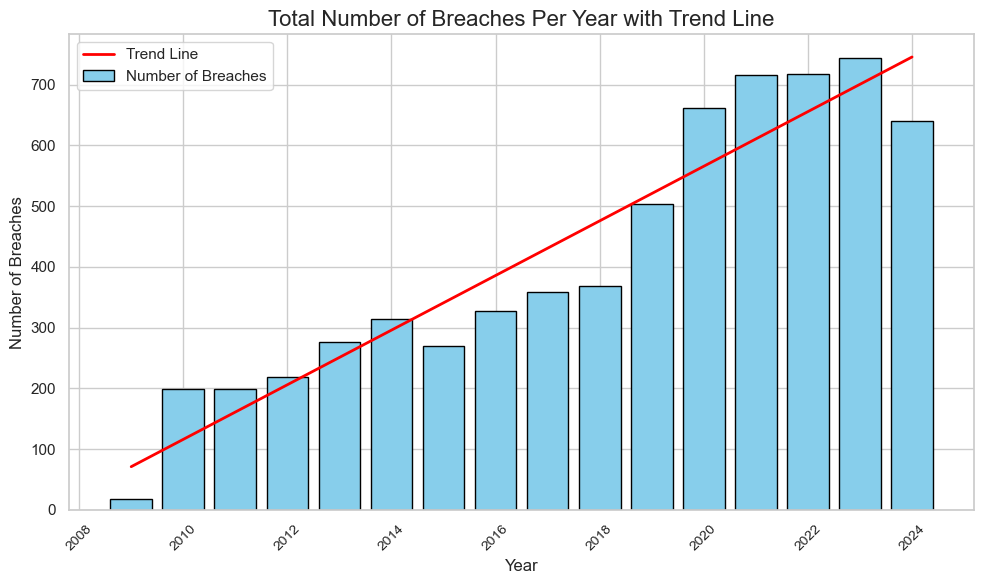

In [1795]:
# First, we can count the total number of occurrences for the number of breaches using 'value_counts()' for better readability
# The goal is distinctly show the discrete number of breaches per year and see if there is type of trend over time

# Count breaches per year
breaches_per_year = df_cleaned['Year'].value_counts().reset_index()
breaches_per_year.columns = ['Year', 'Count']
breaches_per_year = breaches_per_year.sort_values('Year')

# Since we are plotting the count of breaches for each year we have to extract x (Year) and y (Count) values
x = breaches_per_year['Year']
y = breaches_per_year['Count']


# Fit a trend line using numpy (linear regression)
z = np.polyfit(x, y, 1)  # Fit a 1st-degree polynomial (linear)
p = np.poly1d(z)

# Generate the trend line values
trend_line = p(x)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, y, color='skyblue', edgecolor='black', label='Number of Breaches')

# Overlay the trend line
plt.plot(x, trend_line, color='red', linewidth=2, label='Trend Line')

# Add labels, title, and legend
plt.title('Total Number of Breaches Per Year with Trend Line', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

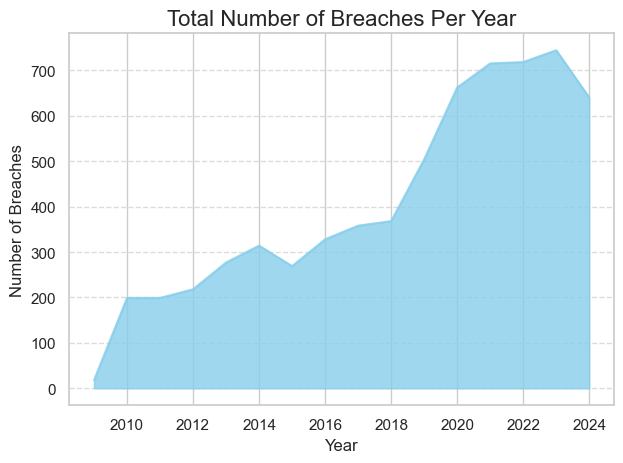

In [1796]:
# Area Chart Visualization to emphasize the magnitude of the cumulative data over time, while highlighting the trend and fluctuations

plt.figure(figsize=(10, 6))
breaches_per_year.plot(x='Year', y='Count', kind='area', color='skyblue', alpha=0.8, legend=False)
plt.title('Total Number of Breaches Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### What is the geographic distribution of these cyberattacks?

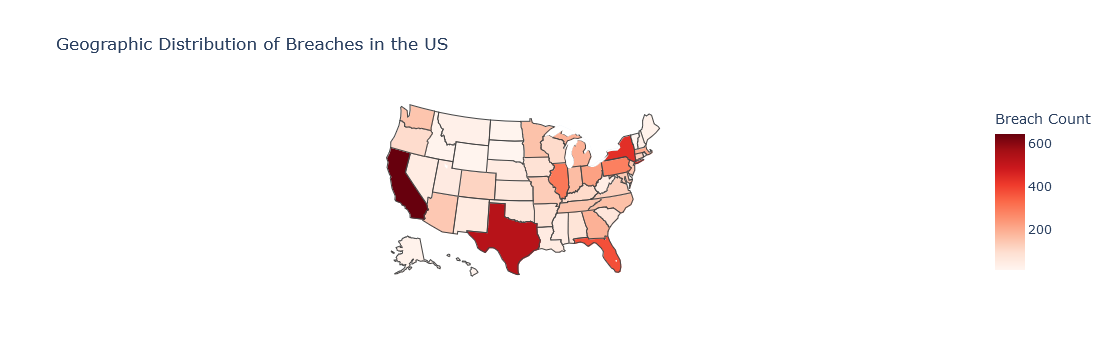

In [1798]:
# In order to show a geographic view of where these data breaches are happening, we can use a choropleth map to visualize the data

# First, we have to aggregate breaches by state
state_breach_counts = df_cleaned.groupby('State')['Type of Breach'].count().reset_index()
state_breach_counts.columns = ['State', 'Breach Count']

# Then, create a choropleth map
fig = px.choropleth(
    state_breach_counts,
    locations='State',  # Column with state abbreviations
    locationmode='USA-states',  # Map type
    color='Breach Count',  # Values to color the map
    color_continuous_scale='Reds',  # Color scale
    scope='usa',  # Focus on the US
    title='Geographic Distribution of Breaches in the US'
)

# Customize layout for better display
fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)',  # Set water to white
        showlakes=True,
    )
)

# Display the plot
fig.show()

#### Further analysis of state with the highest incident of breaches

In [1800]:
# Based on the choropleth map above, we can determine that CA has the highest amount of reported breaches accounting for 648
# To analyze the individual state further, we will do the following steps (these can be repeated for any particular state of interest)

# Step 1: Filter data for the specific state, in this case we will filter for California
selected_state = 'CA'  # Abbreviation for the state to analyze (easy to change and look at other states as well if necessary)
state_data = df_cleaned[df_cleaned['State'] == selected_state]


# Descriptive analysis regarding the breaches in California
# Summary statistics for breaches in California
california_summary = state_data['Individuals Affected'].describe()

# Count breaches by type in California
breach_types_ca = state_data['Type of Breach'].value_counts()

# Count breaches by entity type in California
entity_types_ca = state_data['Entity Type'].value_counts()


display(state_data.head(3))

print("Summary of Individuals Affected in California:")
print(california_summary)

print("\nMost Common Breach Types in California:")
print(breach_types_ca)

print("\nEntity Types Most Frequently Targeted in California:")
print(entity_types_ca)

,Entity Name,State,Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Breach Location,Business Associate Present,Breach Size Category,Updated Breach Size Category,Year
1,"Baker Places, Inc.",CA,Business Associate,971,2024-08-16,Hacking/IT Incident,Email,Yes,"<50,000","<1,000",2024
3,Janna Pharmacy LLC,CA,Healthcare Provider,26372,2024-07-10,Unauthorized Access/Disclosure,Email,No,"<50,000","10,001-50,000",2024
10,Adventist Health Tulare,CA,Healthcare Provider,70802,2024-05-31,Hacking/IT Incident,Network Server,Yes,"50,001-100,000","50,001-100,000",2024


Summary of Individuals Affected in California:
count    6.480000e+02
mean     7.960499e+04
std      5.980013e+05
min      5.000000e+02
25%      1.227750e+03
50%      3.400000e+03
75%      1.553025e+04
max      1.340000e+07
Name: Individuals Affected, dtype: float64

Most Common Breach Types in California:
Type of Breach
Hacking/IT Incident               295
Theft                             164
Unauthorized Access/Disclosure    145
Loss                               23
Other                              16
Improper Disposal                   4
Unknown                             1
Name: count, dtype: int64

Entity Types Most Frequently Targeted in California:
Entity Type
Healthcare Provider          448
Business Associate           108
Health Plan                   89
Healthcare Clearing House      3
Name: count, dtype: int64


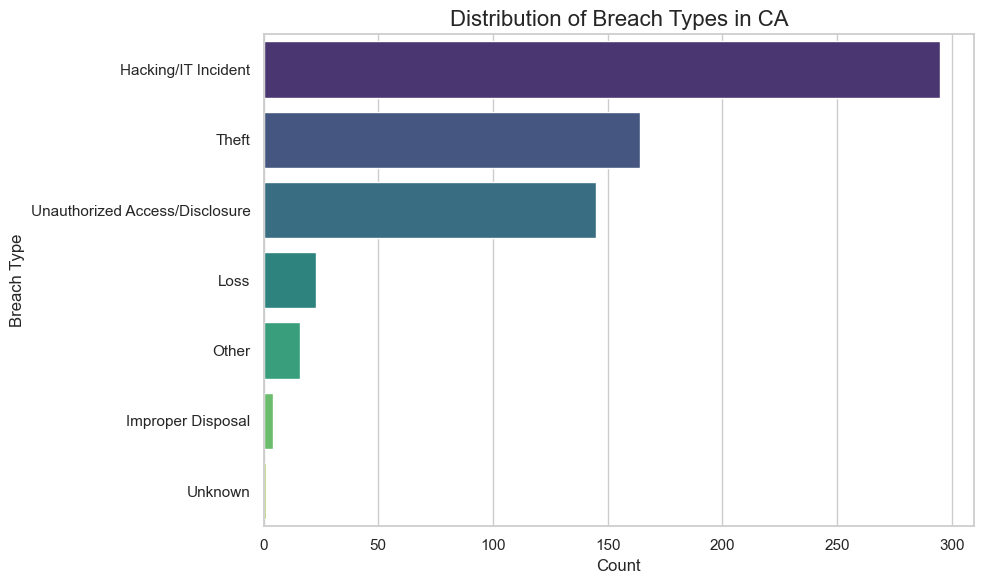

In [1801]:
# Assess the Most Common Breach Types in California

# Step 2: Aggregate breach types for the state
breach_type_counts = state_data['Type of Breach'].value_counts()

# Step 3: Bar plot to visualize breach types within the state
plt.figure(figsize=(10, 6))
sns.barplot(
    x=breach_type_counts.values,
    y=breach_type_counts.index,
    palette='viridis'
)
plt.title(f'Distribution of Breach Types in {selected_state}', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Breach Type', fontsize=12)
plt.tight_layout()
plt.show()

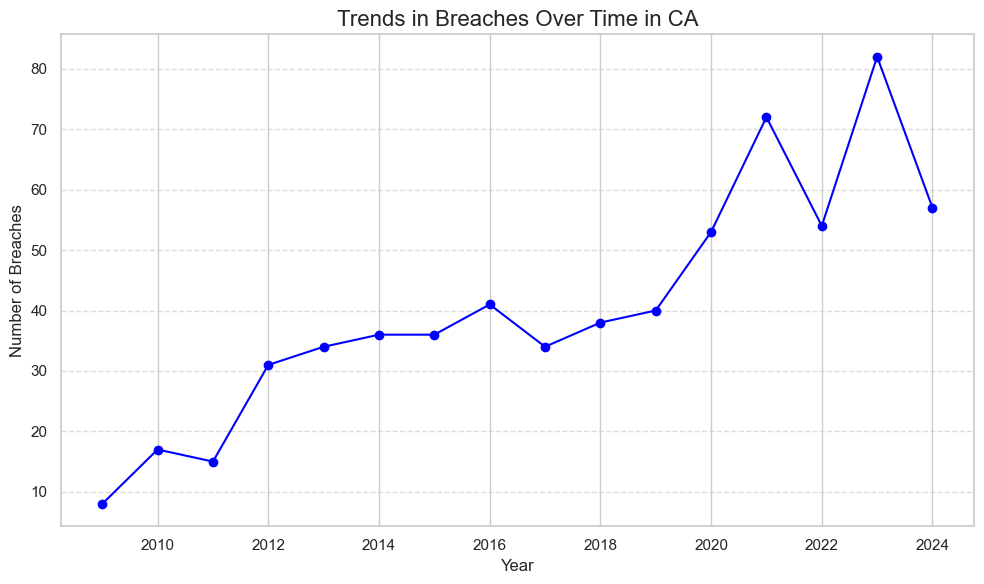

In [1802]:
# Analyze how breaches in California have changed over time

# Extract year from Breach Submission Date
state_data['Year'] = pd.to_datetime(state_data['Breach Submission Date']).dt.year

# Count breaches by year
breaches_ca_over_time = state_data['Year'].value_counts().sort_index()

# Plot trends over time
plt.figure(figsize=(10, 6))
breaches_ca_over_time.plot(kind='line', marker='o', color='blue')
plt.title(f'Trends in Breaches Over Time in {selected_state}', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

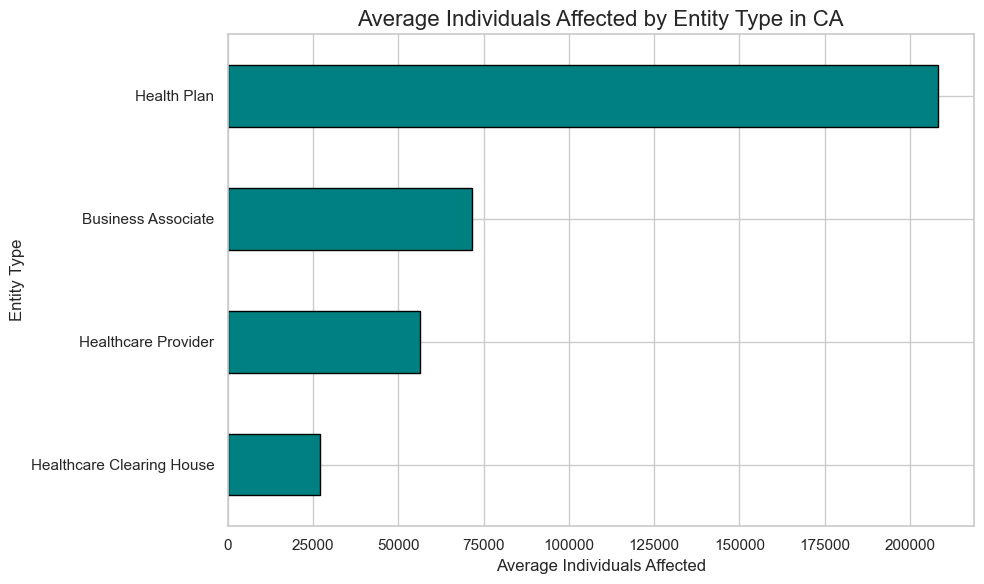

In [1803]:
# Investigate which types of entities are most impacted in California

# Average individuals affected by entity type in California
avg_entity_ca = state_data.groupby('Entity Type')['Individuals Affected'].mean().sort_values()

# Visualize
plt.figure(figsize=(10, 6))
avg_entity_ca.plot(kind='barh', color='teal', edgecolor='black')
plt.title(f'Average Individuals Affected by Entity Type in {selected_state}', fontsize=16)
plt.xlabel('Average Individuals Affected', fontsize=12)
plt.ylabel('Entity Type', fontsize=12)
plt.tight_layout()
plt.show()

#### Which states contributed to the highest number of individuals affected?

In [1805]:
# Sum up the total number of Individuals Affected for each state. This will give the contribution of each state to the total impact.

# Aggregate total individuals affected by state
state_impact = df_cleaned.groupby('State')['Individuals Affected'].sum().reset_index()

# Sort states by individuals affected in descending order
state_impact = state_impact.sort_values(by='Individuals Affected', ascending=False)

# Display the top 10 states
print(state_impact.head(10))

   State  Individuals Affected
23    MN             118312345
15    IN              91613045
4     CA              51584032
9     FL              43204836
44    TX              38354756
34    NY              36575885
43    TN              31564982
5     CO              25989910
46    VA              22403588
10    GA              20403813


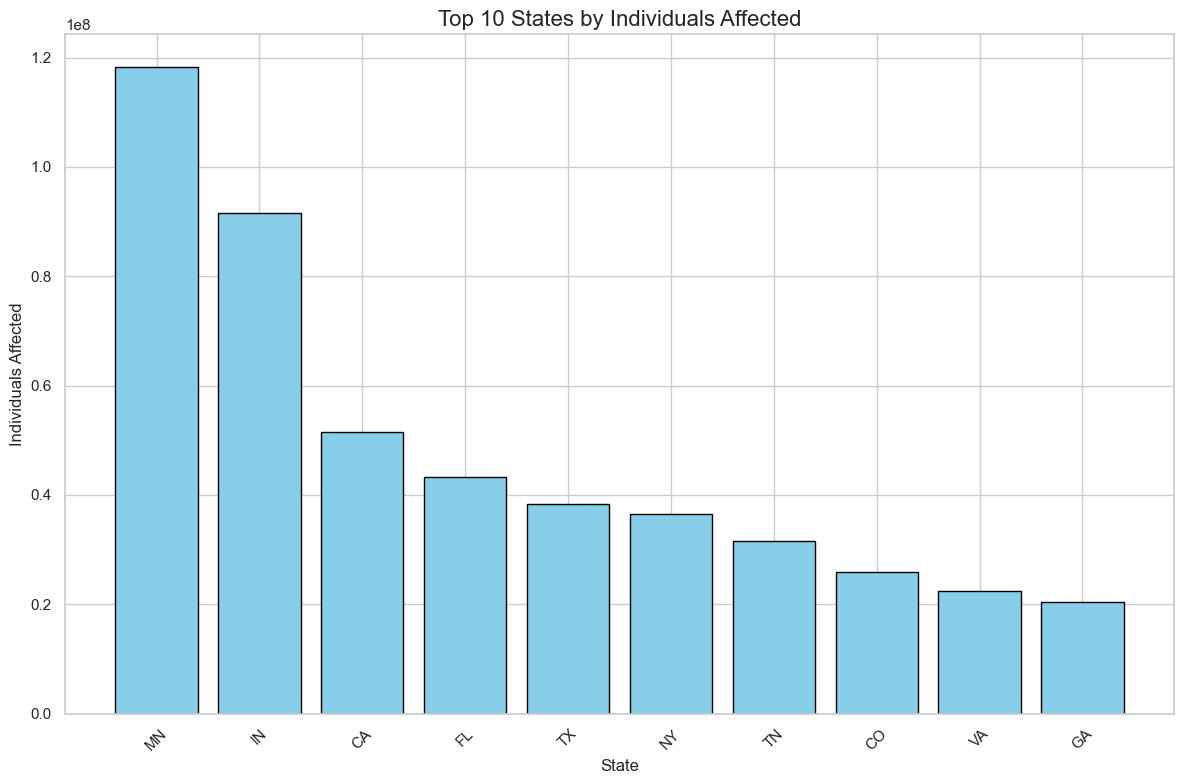

In [1806]:
# Narrow focus to top 10 states (can be any amount)

# Select top 10 states
top_states = state_impact.head(10)

# Bar chart for top 10 states
plt.figure(figsize=(12, 8))
plt.bar(top_states['State'], top_states['Individuals Affected'], color='skyblue', edgecolor='black')
plt.title('Top 10 States by Individuals Affected', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Individuals Affected', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1807]:
# Additional summary statistics to determine the percentage contribution of each state to the total impact and the cumulative percentage for top states.

# Calculate percentage contribution
state_impact['Percentage'] = (state_impact['Individuals Affected'] / state_impact['Individuals Affected'].sum()) * 100

# Add cumulative percentage for top states
state_impact['Cumulative Percentage'] = state_impact['Percentage'].cumsum()

# Display top contributors with cumulative percentages
print(state_impact.head(10))

   State  Individuals Affected  Percentage  Cumulative Percentage
23    MN             118312345   16.162915              16.162915
15    IN              91613045   12.515464              28.678378
4     CA              51584032    7.047010              35.725389
9     FL              43204836    5.902310              41.627698
44    TX              38354756    5.239729              46.867428
34    NY              36575885    4.996714              51.864141
43    TN              31564982    4.312163              56.176304
5     CO              25989910    3.550540              59.726844
46    VA              22403588    3.060604              62.787449
10    GA              20403813    2.787411              65.574859


In [1808]:
# Create a pivot table for total individuals affected by state
pivot_table_state = df_cleaned.pivot_table(
    index='State',  # Rows: States
    values='Individuals Affected',  # Values: Individuals Affected
    aggfunc='sum'  # Aggregation: Sum
)

# Sort pivot table in descending order to see top contributors
pivot_table_state = pivot_table_state.sort_values(by='Individuals Affected', ascending=False)

# Display the pivot table
print(pivot_table_state)

       Individuals Affected
State                      
MN                118312345
IN                 91613045
CA                 51584032
FL                 43204836
TX                 38354756
NY                 36575885
TN                 31564982
CO                 25989910
VA                 22403588
GA                 20403813
WA                 19667842
NC                 18743187
IL                 16190022
PA                 14620785
AZ                 13324262
MD                 12680984
OH                 12378579
WI                 12304501
MI                 11801935
NJ                 11737877
MA                 11550081
NV                 11176325
KY                 10719860
MO                  7479698
UT                  6931611
OK                  6041880
IA                  5393632
OR                  5210307
LA                  4284303
DE                  3892307
AL                  3790307
NE                  3688761
NM                  3656062
CT                  

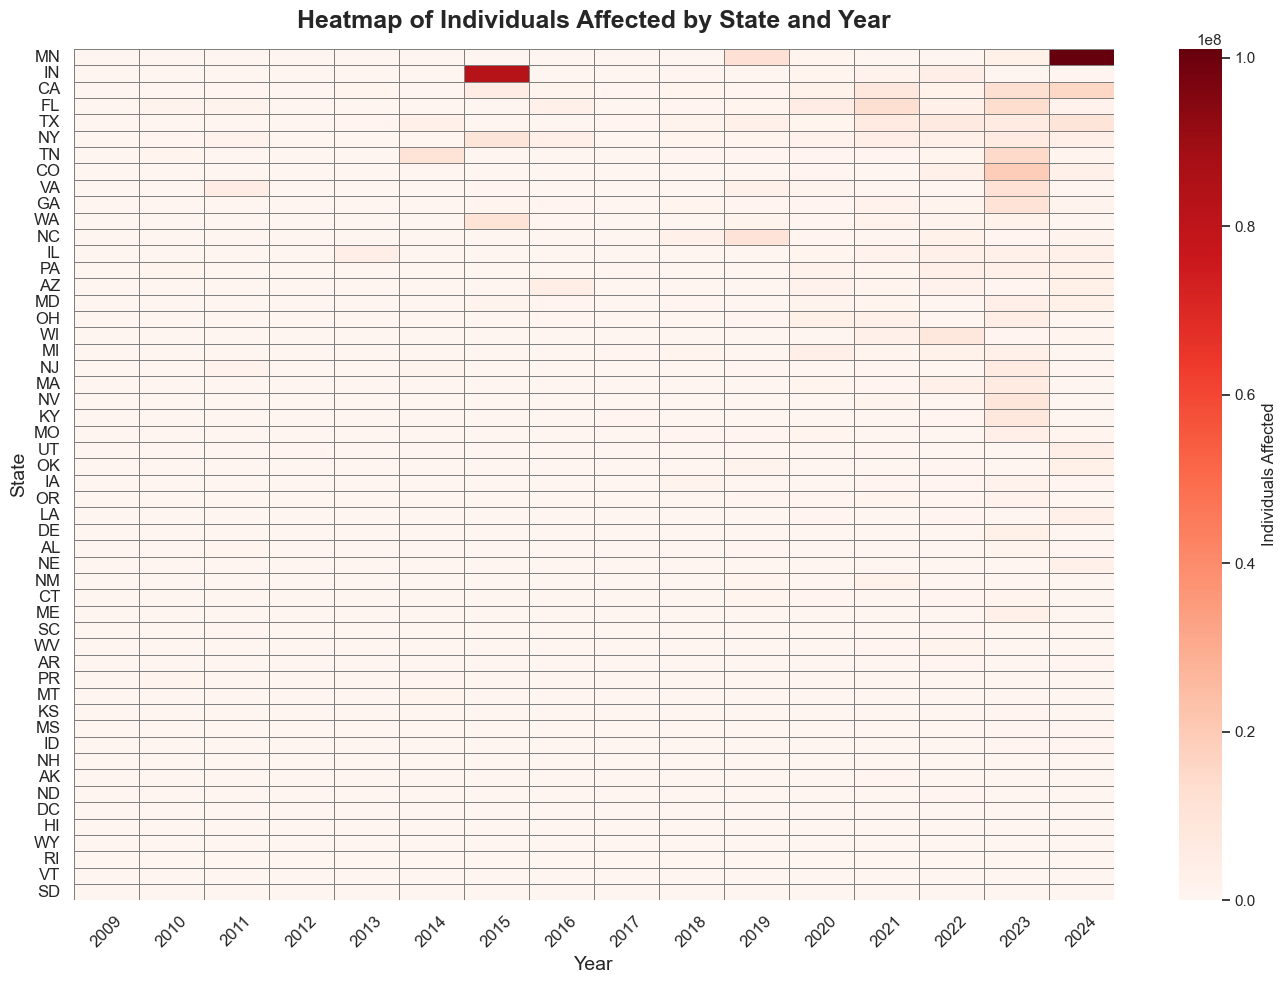

In [1809]:
# Heatmap visualization of pivot table for better clarify 

# Sort states by total individuals affected
pivot_table_state_year = pivot_table_state_year.loc[pivot_table_state_year.sum(axis=1).sort_values(ascending=False).index]

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    pivot_table_state_year, 
    cmap='Reds',  # Use a visually appealing colormap
    annot=False,  # Annotate cells with values
    cbar_kws={'label': 'Individuals Affected'},  # Add color bar label
    linewidths=0.5,  # Add grid lines for clarity
    linecolor='gray',  # Color of grid lines
    vmin=0,  # Set minimum value for colormap
    vmax=pivot_table_state_year.values.max(),  # Dynamically scale colormap
    xticklabels=True,
    yticklabels=True
)

# Customize plot appearance
plt.title('Heatmap of Individuals Affected by State and Year', fontsize=18, weight='bold', pad=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

### What is the distribution of the different breach types that occurred from 2009 to 2024?

In [1811]:
# We can count the total number of occurrences for each type of breach using 'value_counts()' for better readability

# Count occurrences of each type of breach
breach_counts = df_cleaned['Type of Breach'].value_counts()

# Display the breach comparison table
print("Comparison of Breach Types:")
print(breach_counts)

Comparison of Breach Types:
Type of Breach
Hacking/IT Incident               3593
Unauthorized Access/Disclosure    1464
Theft                             1018
Loss                               234
Improper Disposal                  120
Other                               92
Unknown                             10
Name: count, dtype: int64


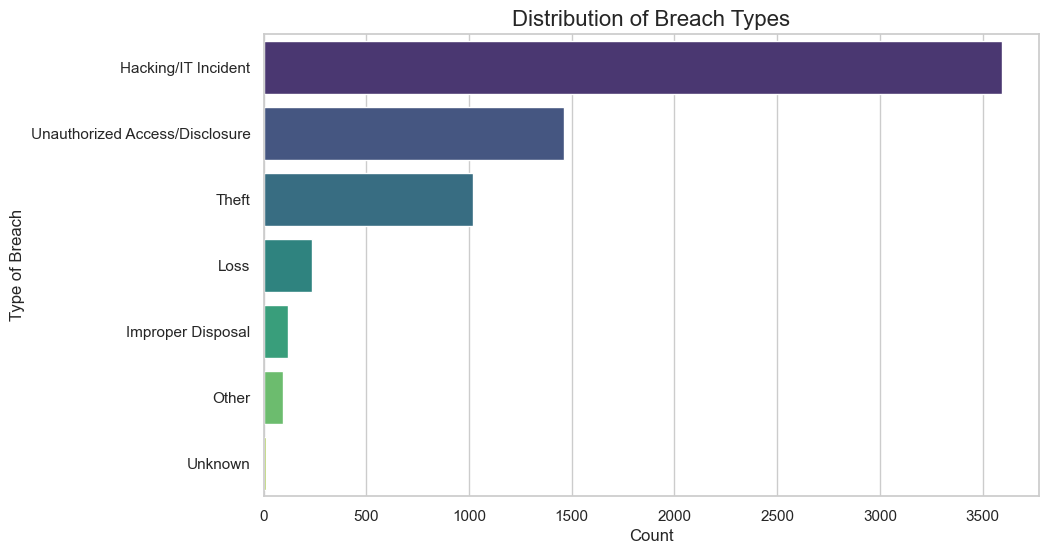

In [1812]:
# After determining the count of each type of breach, we can get a visual of the most and least common breach types while comparing the total counts with each other

# Visualize the breach types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, y='Type of Breach', order=breach_counts.index, palette='viridis')

# Customize plot appearance
plt.title('Distribution of Breach Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Type of Breach', fontsize=12)
plt.show()

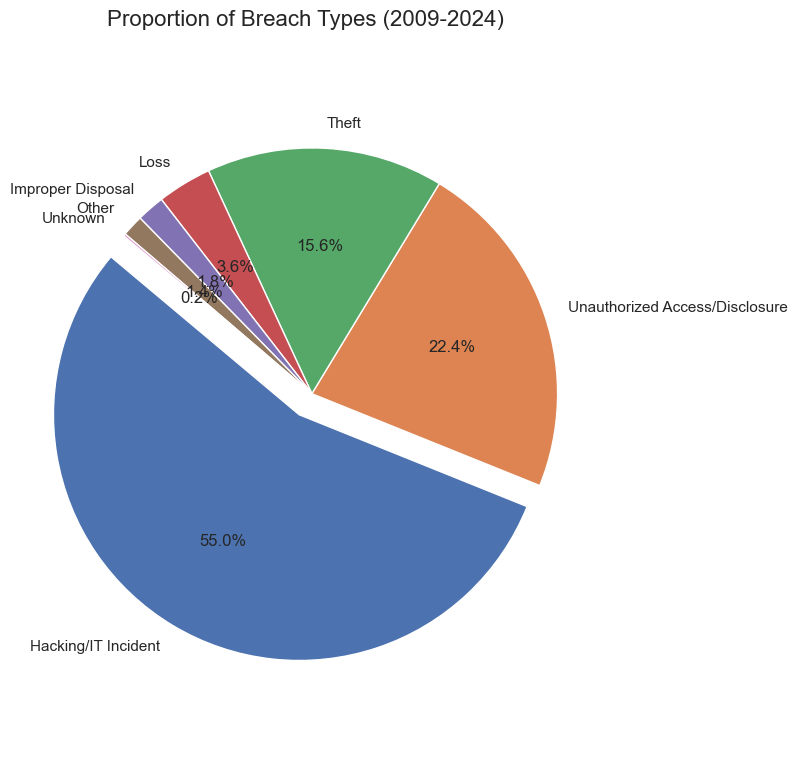

In [1813]:
# Next, a pie chart can be used to display the percentage/proportion of each breach type in the dataset.

# For more emphasis on the most common breach type we can use the explode function on that slice of the pie
# A list comprehension is used to check if the breach type is 'Hacking/IT incident' because if it matches the slice is assigned the pre-determined explode value

explode_values = [0.1 if breach == "Hacking/IT Incident" else 0 for breach in breach_counts.index]

# Visualization: Pie chart with exploded "Hacking/IT Incident" slice
plt.figure(figsize=(8, 8))
plt.pie(
    breach_counts,
    labels=breach_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode_values  # Explode the "Hacking/IT Incident" slice
)
plt.title('Proportion of Breach Types (2009-2024)', fontsize=16)
plt.axis('equal')  # Ensures the pie chart is a circle
plt.tight_layout()
plt.show()

### How does the incident of each type of breach change over time?

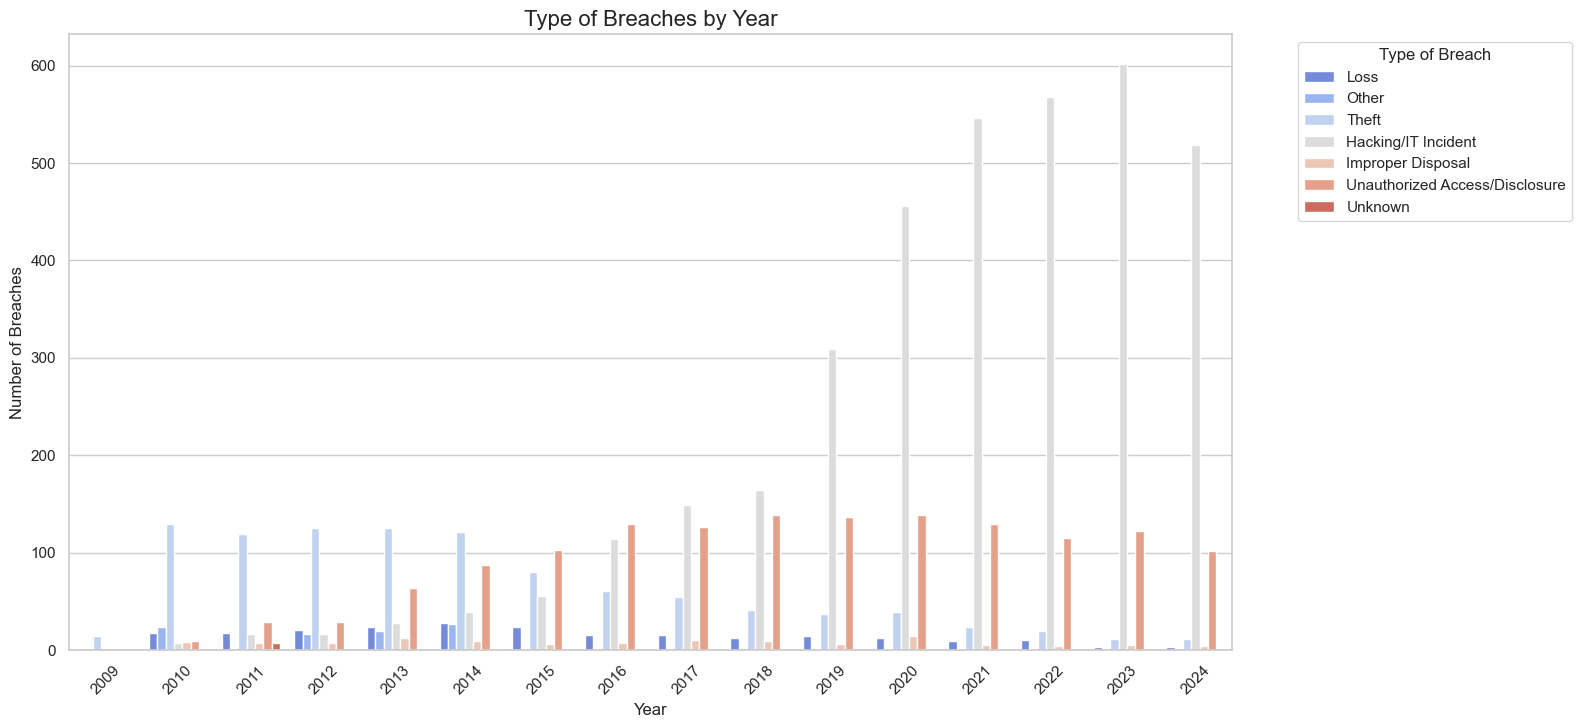

In [1815]:
# Now that we have looked at the distribution of the type of breach, let's see how the type of breach changes over time 

# Extract the year from the Breach Submission Date
df_cleaned['Year'] = pd.to_datetime(df_cleaned['Breach Submission Date']).dt.year

# Group by Year and Type of Breach
breach_by_year = df_cleaned.groupby(['Year', 'Type of Breach']).size().reset_index(name='Counts')

# Visualize breach type trends over the years
plt.figure(figsize=(15, 8))
sns.barplot(data=breach_by_year, x='Year', y='Counts', hue='Type of Breach', palette='coolwarm')
plt.title('Type of Breaches by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.legend(title='Type of Breach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year'>

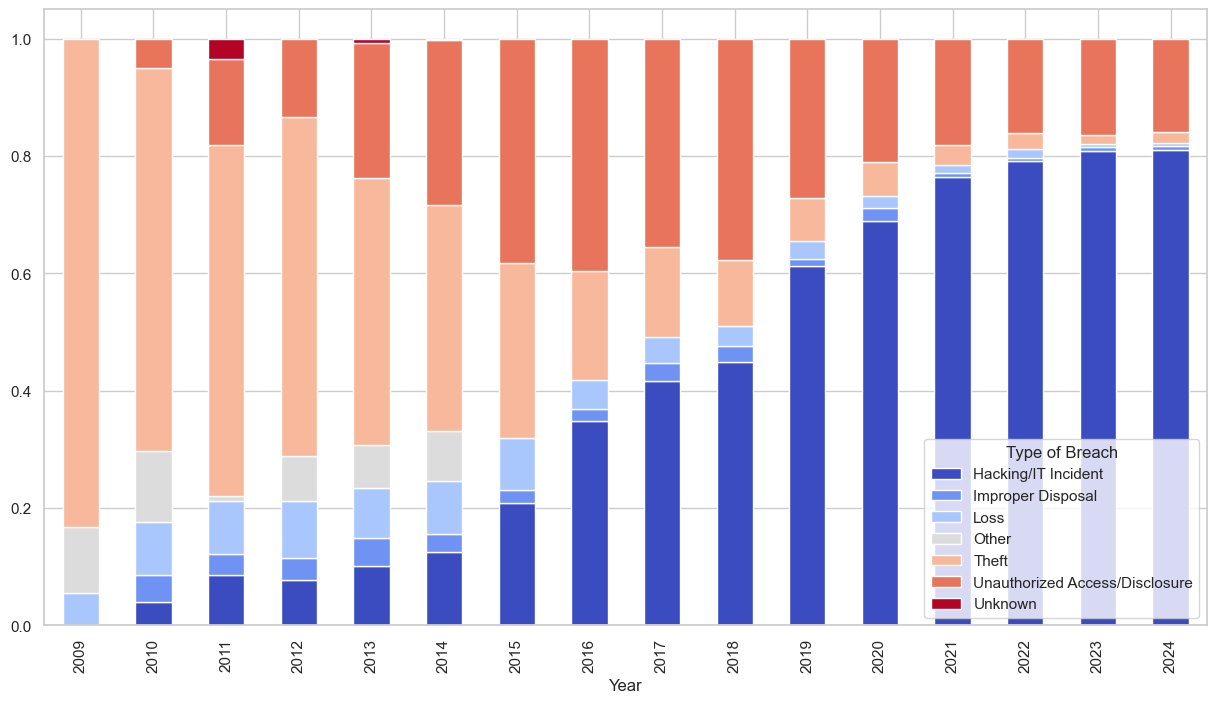

In [1816]:
# We can further analyze the pattern of change by visualizing the percentage contribution of each breach type per year using a stacked bar chart.

breach_percentage = breach_by_year.pivot(index='Year', columns='Type of Breach', values='Counts')
breach_percentage = breach_percentage.div(breach_percentage.sum(axis=1), axis=0)
breach_percentage.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='coolwarm')

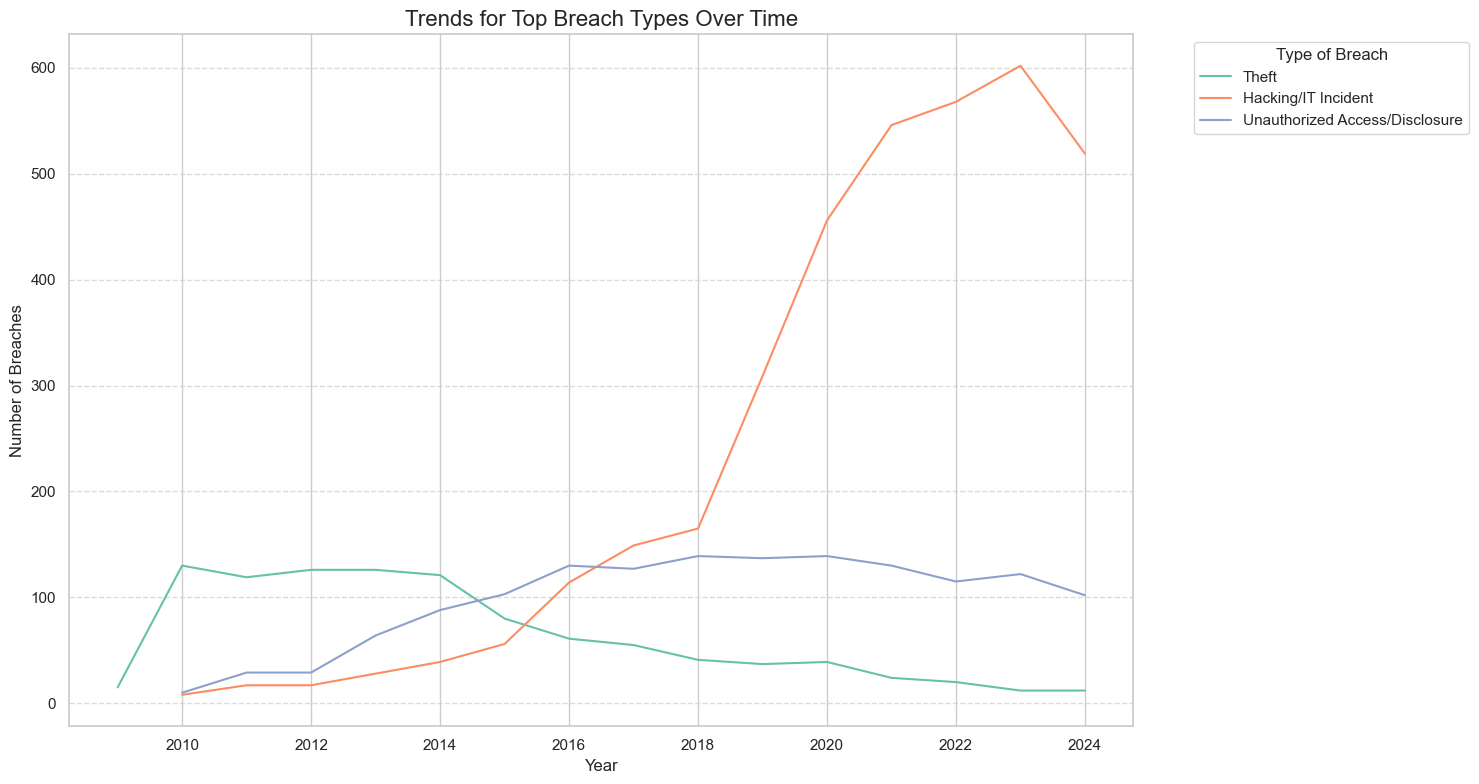

In [1817]:
# Another easier way to see the changes over time is through a lineplot and here we will focus on just the top 3 breach types
# The number can be adjusted as needed for visualization purposes

# Filter top 3 breach types
top_breach_types = df_cleaned['Type of Breach'].value_counts().head(3).index
top_breach_data = breach_by_year[breach_by_year['Type of Breach'].isin(top_breach_types)]

# Lineplot for top breach types
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_breach_data, x='Year', y='Counts', hue='Type of Breach', palette='Set2')
plt.title('Trends for Top Breach Types Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.legend(title='Type of Breach', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [1818]:
# Similar to the stacked bar chart, we can also create an interactive visual to see the percentage of each type of breach at any given year

# Prepare data for interactive stacked area chart
fig = px.area(
    breach_percentage.reset_index(),
    x='Year',
    y=breach_percentage.columns,
    title='Percentage Contribution of Breach Types Over Time',
    labels={'value': 'Percentage', 'variable': 'Type of Breach'},
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(
    yaxis=dict(
        title='Percentage',
        tickmode='linear',  # Ensures evenly spaced ticks
        dtick=0.1,  # Spacing between ticks (e.g., 0.1 for percentages)
        range=[0, 1.1],  # Adjust the y-axis range slightly above 1 for spacing
        title_font=dict(size=14)  # Optional: Adjust font size for axis title
    ),
    xaxis=dict(title='Year', title_font=dict(size=14)),  # Adjust x-axis as well if needed
    title_font_size=16  # Overall title font size
)
fig.show()

### Are certain breach types more commonly associated with breaches affecting more than 50,000 individuals?

In [1820]:
# Summarize the Counts by Breach Type, we already have dataframes setup for different categories of individuals affected that we can utilize

# Combine the relevant dataframes
df_combined = pd.concat([df4, df5, df6_final])

# Group by 'Type of Breach' and count occurrences
breach_type_counts = df_combined['Type of Breach'].value_counts()

# Display the results
print(breach_type_counts)

Type of Breach
Hacking/IT Incident               428
Unauthorized Access/Disclosure     42
Theft                              36
Loss                                5
Other                               5
Improper Disposal                   3
Unknown                             1
Name: count, dtype: int64


Breach Types for Breaches Affecting More Than 50,000 Individuals:
Type of Breach
Hacking/IT Incident               82.307692
Unauthorized Access/Disclosure     8.076923
Theft                              6.923077
Loss                               0.961538
Other                              0.961538
Improper Disposal                  0.576923
Unknown                            0.192308
Name: count, dtype: float64


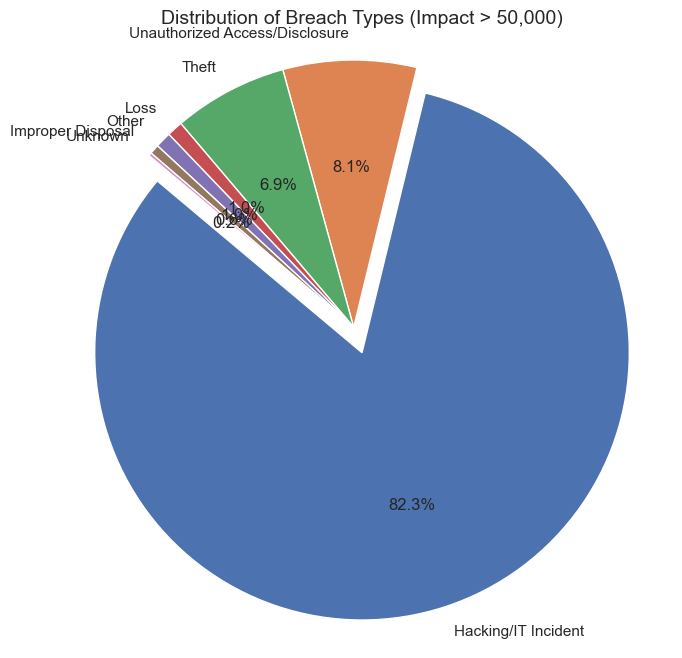

In [1821]:
# Calculate the proportion of breach types for large breaches
large_breach_counts = df_combined['Type of Breach'].value_counts()
large_breach_percentages = (large_breach_counts / large_breach_counts.sum()) * 100

# Display the results
print("Breach Types for Breaches Affecting More Than 50,000 Individuals:")
print(large_breach_percentages)

# Pie chart for types of breaches affecting more than 10,000 individuals
breach_type_counts = df_combined['Type of Breach'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    breach_type_counts,
    labels=breach_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.1 if i == 'Hacking/IT Incident' else 0 for i in breach_type_counts.index]
)
plt.title('Distribution of Breach Types (Impact > 50,000)', fontsize=14)
plt.axis('equal')  # Ensures pie chart is circular
plt.show()

In [1822]:
# To compare breaches greater than 50,000 with breaches below 50,000, calculate the counts for each type in both groups:

# Group counts for breaches above and below 50,000
above_50000 = pd.concat([df4, df5, df6_final]).groupby('Type of Breach').size()
below_50000 = pd.concat([df1, df2, df3]).groupby('Type of Breach').size()

# Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Above 50,000': above_50000,
    'Below 50,000': below_50000
}).fillna(0)

# Calculate percentages
comparison_df['Percentage Above 50,000'] = (comparison_df['Above 50,000'] / 
                                            (comparison_df['Above 50,000'] + comparison_df['Below 50,000'])) * 100

# Display the comparison
display(comparison_df)

,"Above 50,000","Below 50,000","Percentage Above 50,000"
Type of Breach,,,
Hacking/IT Incident,428,2800,13.258984
Improper Disposal,3,112,2.608696
Loss,5,228,2.145923
Other,5,84,5.617978
Theft,36,965,3.596404
Unauthorized Access/Disclosure,42,1398,2.916667
Unknown,1,9,10.000000


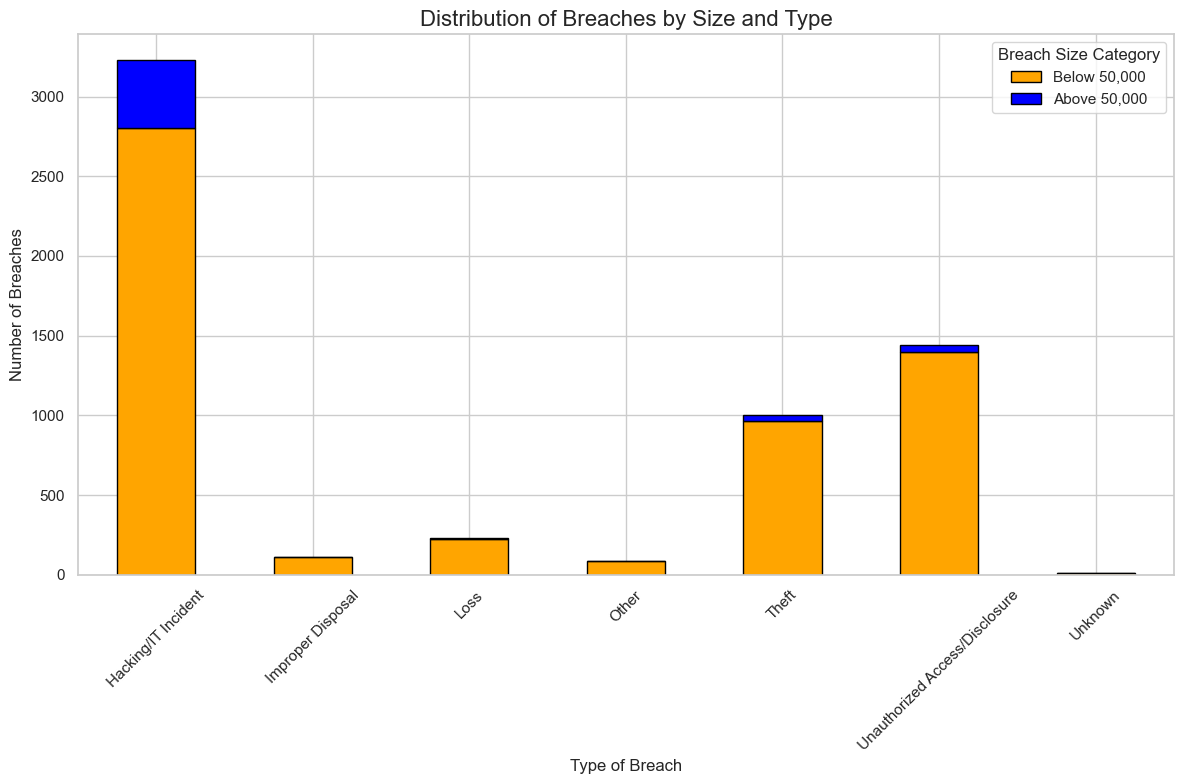

In [1823]:
# Chart to show the actual counts of breaches below and above 50,000 for each type.

# Stacked bar chart 
comparison_df[['Below 50,000', 'Above 50,000']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    color=['orange', 'blue'],
    edgecolor='black'
)
plt.title('Distribution of Breaches by Size and Type', fontsize=16)
plt.xlabel('Type of Breach', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.legend(title='Breach Size Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

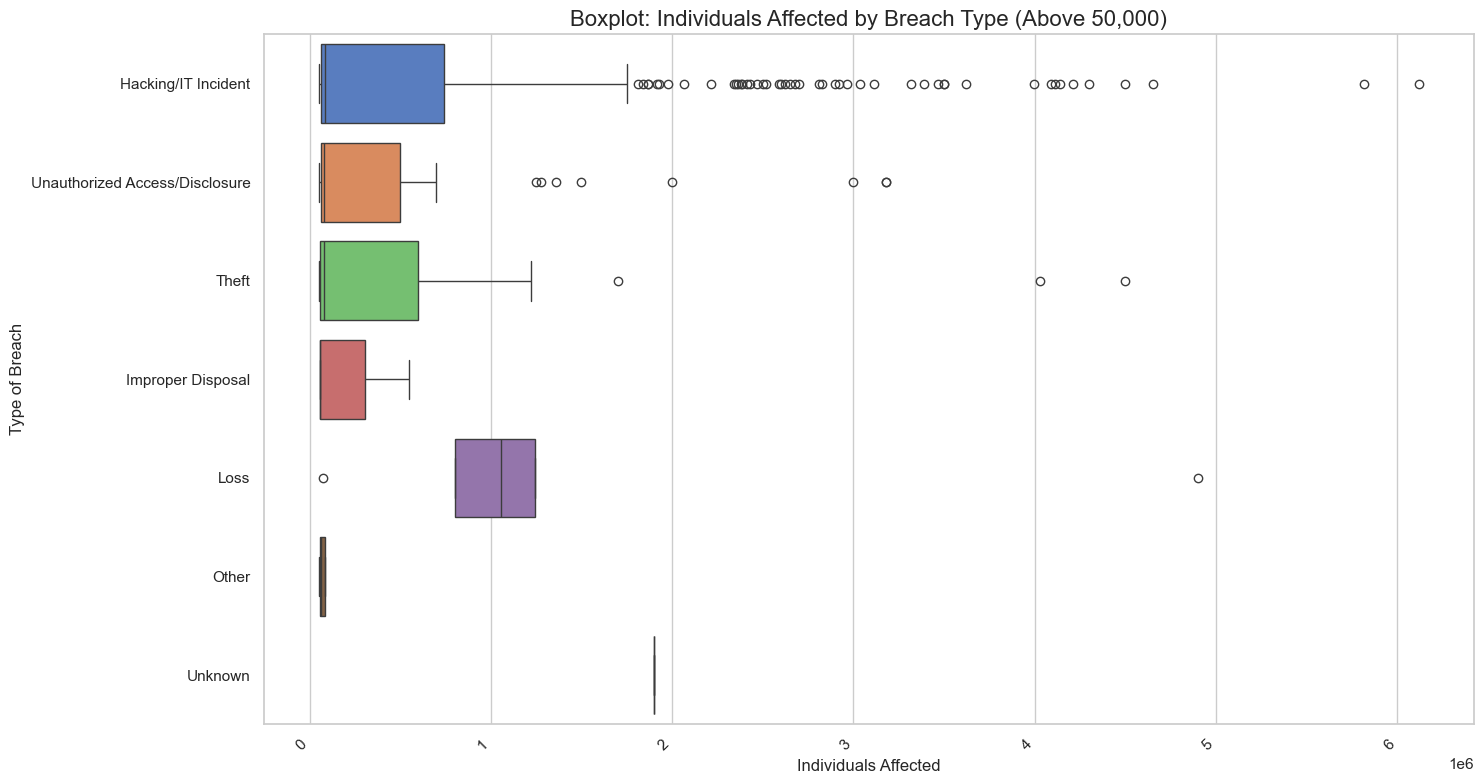

In [1824]:
# Spread and outliers of breaches affecting more than 50,000 individuals across breach types

plt.figure(figsize=(15, 8))
sns.boxplot(
    data=pd.concat([df4, df5, df6_final]),  # Combine data for breaches above 50,000
    x='Individuals Affected',
    y='Type of Breach',
    palette='muted'
)
plt.title('Boxplot: Individuals Affected by Breach Type (Above 50,000)', fontsize=16)
plt.xlabel('Individuals Affected', fontsize=12)
plt.ylabel('Type of Breach', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

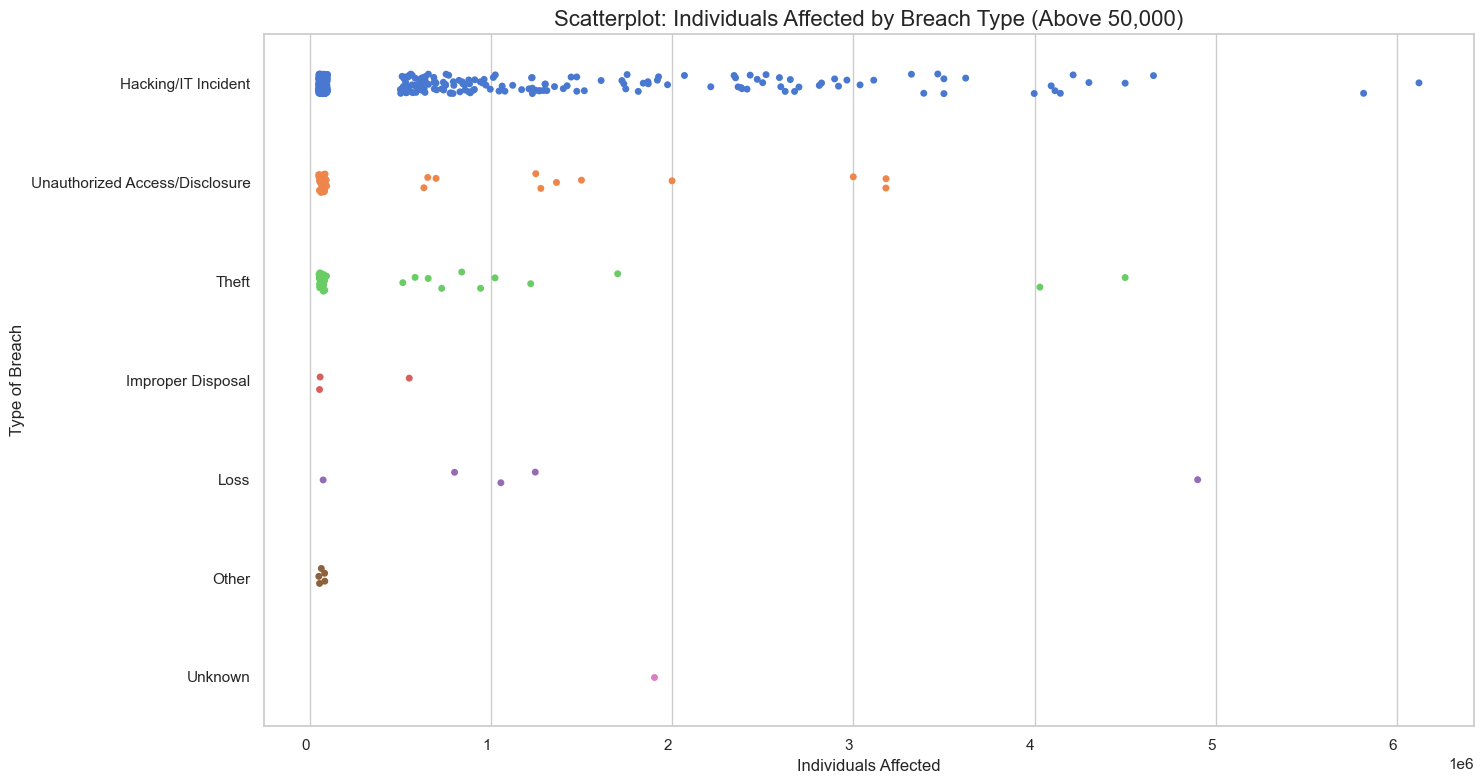

In [1825]:
# Observe any potential patterns or clusters in the relationship between Individuals Affected and Type of Breach

plt.figure(figsize=(15, 8))
sns.stripplot(
    data=pd.concat([df4, df5, df6_final]),  # Combine data for breaches above 50,000
    x='Individuals Affected',
    y='Type of Breach',
    jitter=True,  # Add jitter for better visibility
    palette='muted',
    size=5
)
plt.title('Scatterplot: Individuals Affected by Breach Type (Above 50,000)', fontsize=16)
plt.xlabel('Individuals Affected', fontsize=12)
plt.ylabel('Type of Breach', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


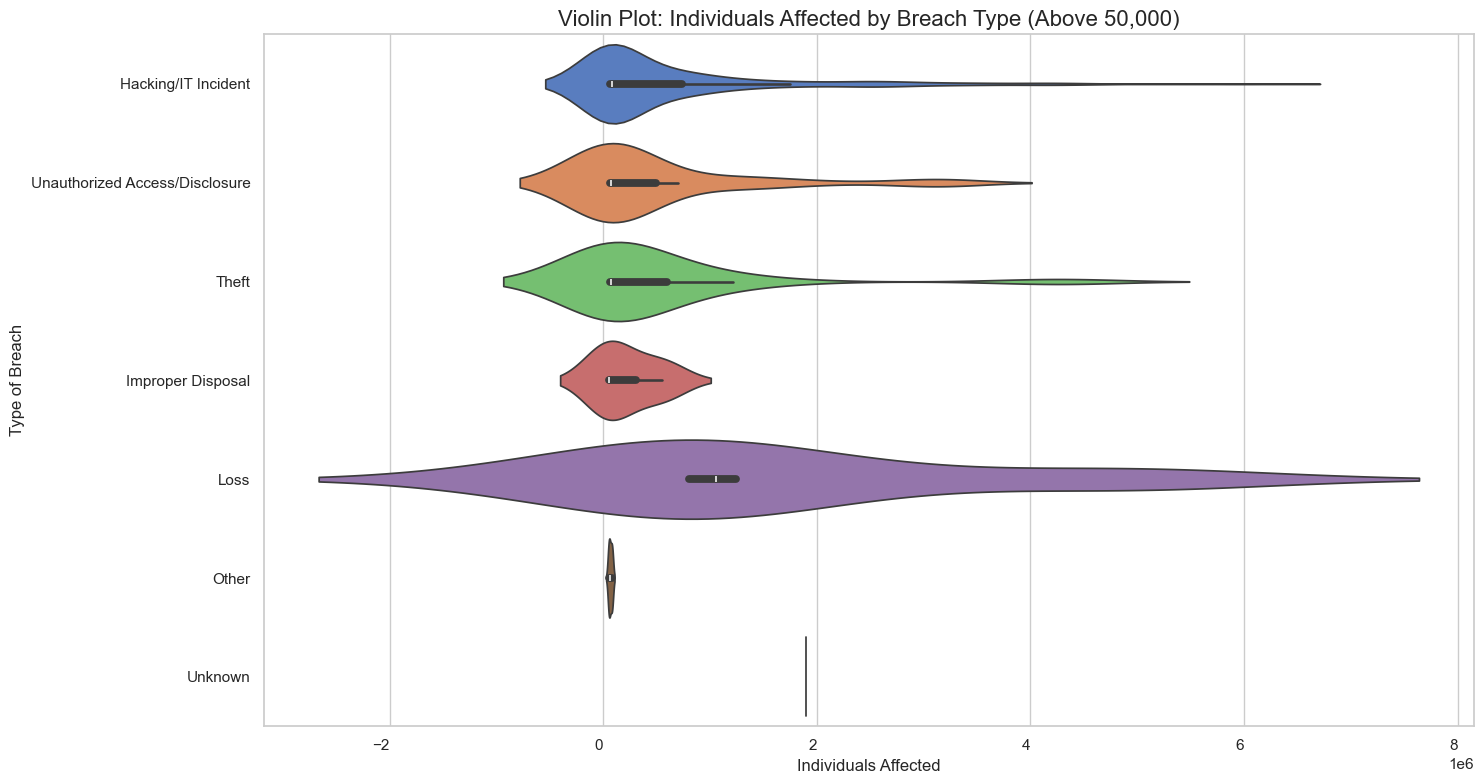

In [1826]:
# Helpful to show the distribution and density of individuals affected for each breach type
# line in the center of the embedded boxplot shows the median number of individuals affected for each breach type
# The width of the violin shows where breaches are concentrated
# A long tail upward suggests some breaches of that type result in very large numbers of individuals affected

plt.figure(figsize=(15, 8))
sns.violinplot(
    data=pd.concat([df4, df5, df6_final]),  # Combine data for breaches above 50,000
    x='Individuals Affected',
    y='Type of Breach',
    palette='muted',
    scale='width'  # Scale violins by their width
)
plt.title('Violin Plot: Individuals Affected by Breach Type (Above 50,000)', fontsize=16)
plt.xlabel('Individuals Affected', fontsize=12)
plt.ylabel('Type of Breach', fontsize=12)
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

#### What percentage of breaches affect more than 50,000?

In [1828]:
# Calculate total breaches and breaches affecting more than 10,000
total_breaches = len(df_cleaned)
large_breach_count = len(df_combined)

# Calculate the percentage
large_breach_percentage = (large_breach_count / total_breaches) * 100
print(f"Percentage of breaches affecting more than 50,000 individuals: {large_breach_percentage:.1f}%")

Percentage of breaches affecting more than 50,000 individuals: 8.0%


### Which Entity Type was targeted the most?

                 Entity Type  Breaches_Count  Avg_Individuals_Affected  \
3        Healthcare Provider            4687              52999.001920   
0         Business Associate             997             320305.350050   
1                Health Plan             834             196742.167866   
2  Healthcare Clearing House              13              12699.153846   

   Percentage_Breaches  
3            71.765426  
0            15.265656  
1            12.769867  
2             0.199051  


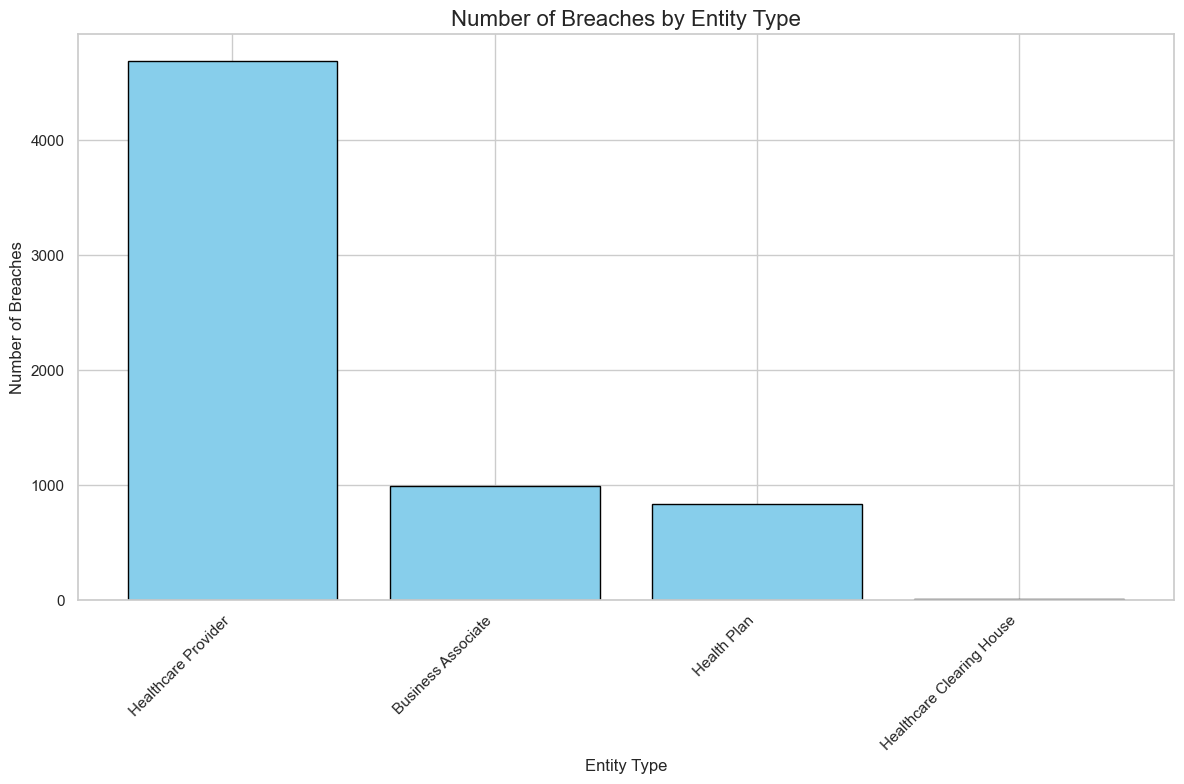

In [1830]:
# Group by Entity Type to count breaches and calculate the average number of individuals affected
entity_summary = df_cleaned.groupby('Entity Type').agg(
    Breaches_Count=('Entity Name', 'size'),  # Count the number of breaches
    Avg_Individuals_Affected=('Individuals Affected', 'mean')  # Calculate the average
).reset_index()

# Sort the data by Breaches_Count for better visualization
entity_summary = entity_summary.sort_values(by='Breaches_Count', ascending=False)

# Add percentage of total breaches to the summary
entity_summary['Percentage_Breaches'] = (entity_summary['Breaches_Count'] / entity_summary['Breaches_Count'].sum()) * 100
print(entity_summary)

# Bar chart for number of breaches
plt.figure(figsize=(12, 8))
plt.bar(entity_summary['Entity Type'], entity_summary['Breaches_Count'], color='skyblue', edgecolor='black')
plt.title('Number of Breaches by Entity Type', fontsize=16)
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [1831]:
# Pivot table of the cleaned dataset focusing on the Entity Type and Individuals Affected

pivot_table = df_cleaned.pivot_table(
    values='Individuals Affected', 
    index='Entity Type', 
    aggfunc=['count', 'mean', 'median', 'std']
)
display(pivot_table)

,count,mean,median,std
,Individuals Affected,Individuals Affected,Individuals Affected,Individuals Affected
Entity Type,,,,
Business Associate,997,320305.350050,5497.0,3.317171e+06
Health Plan,834,196742.167866,2870.0,2.824054e+06
Healthcare Clearing House,13,12699.153846,2300.0,2.306554e+04
Healthcare Provider,4687,52999.001920,3501.0,2.928666e+05


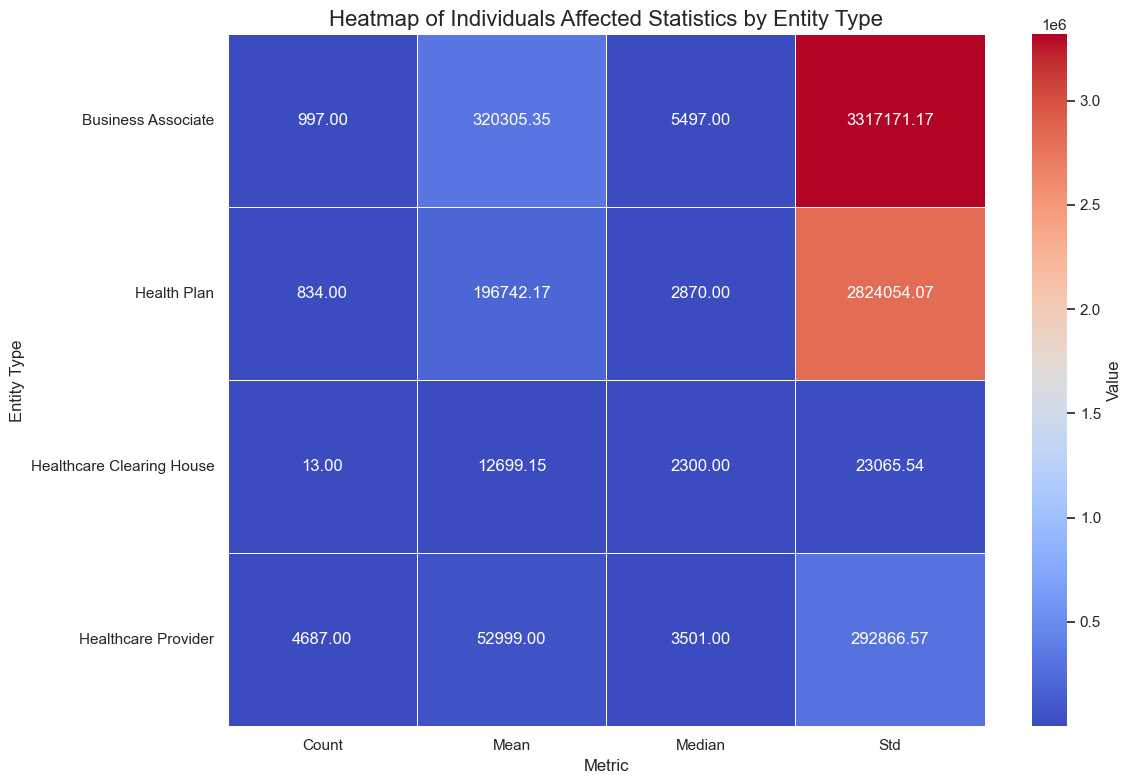

In [1832]:
# Visual representation of the pivot table

# Prepare pivot table for heatmap
pivot_heatmap = pivot_table.copy()
pivot_heatmap.columns = ['Count', 'Mean', 'Median', 'Std']

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_heatmap, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title('Heatmap of Individuals Affected Statistics by Entity Type', fontsize=16)
plt.ylabel('Entity Type', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.tight_layout()
plt.show()

#### How does the type of breach differ based on Entity Type for each of the categorized data frames?

In [1834]:
# Determine Breaches by Entity Type for Each Dataframe

# Function to count breach frequency by entity type for a given dataframe
def entity_type_analysis(df):
    return df['Entity Type'].value_counts()

# Analyze entity types for each dataframe
entity_df1 = entity_type_analysis(df1)
entity_df2 = entity_type_analysis(df2)
entity_df3 = entity_type_analysis(df3)
entity_df4 = entity_type_analysis(df4)
entity_df5 = entity_type_analysis(df5)
entity_df6 = entity_type_analysis(df6_final)

# Display the results for each dataframe
print("Entity Types for df1 (<1,000):")
print(entity_df1)

print("\nEntity Types for df2 (1,001-10,000):")
print(entity_df2)

print("\nEntity Types for df3 (10,001-50,000):")
print(entity_df3)

print("\nEntity Types for df4 (50,001-100,000):")
print(entity_df4)

print("\nEntity Types for df5 (500,001-1,000,000):")
print(entity_df5)

print("\nEntity Types for df6 (>1,000,000):")
print(entity_df6)


Entity Types for df1 (<1,000):
Entity Type
Healthcare Provider          998
Health Plan                  212
Business Associate           161
Healthcare Clearing House      2
Name: count, dtype: int64

Entity Types for df2 (1,001-10,000):
Entity Type
Healthcare Provider          2190
Business Associate            432
Health Plan                   404
Healthcare Clearing House       8
Name: count, dtype: int64

Entity Types for df3 (10,001-50,000):
Entity Type
Healthcare Provider          880
Business Associate           188
Health Plan                  119
Healthcare Clearing House      2
Name: count, dtype: int64

Entity Types for df4 (50,001-100,000):
Entity Type
Healthcare Provider          245
Business Associate            53
Health Plan                   33
Healthcare Clearing House      1
Name: count, dtype: int64

Entity Types for df5 (500,001-1,000,000):
Entity Type
Healthcare Provider    55
Business Associate     24
Health Plan            13
Name: count, dtype: int64

Entity T

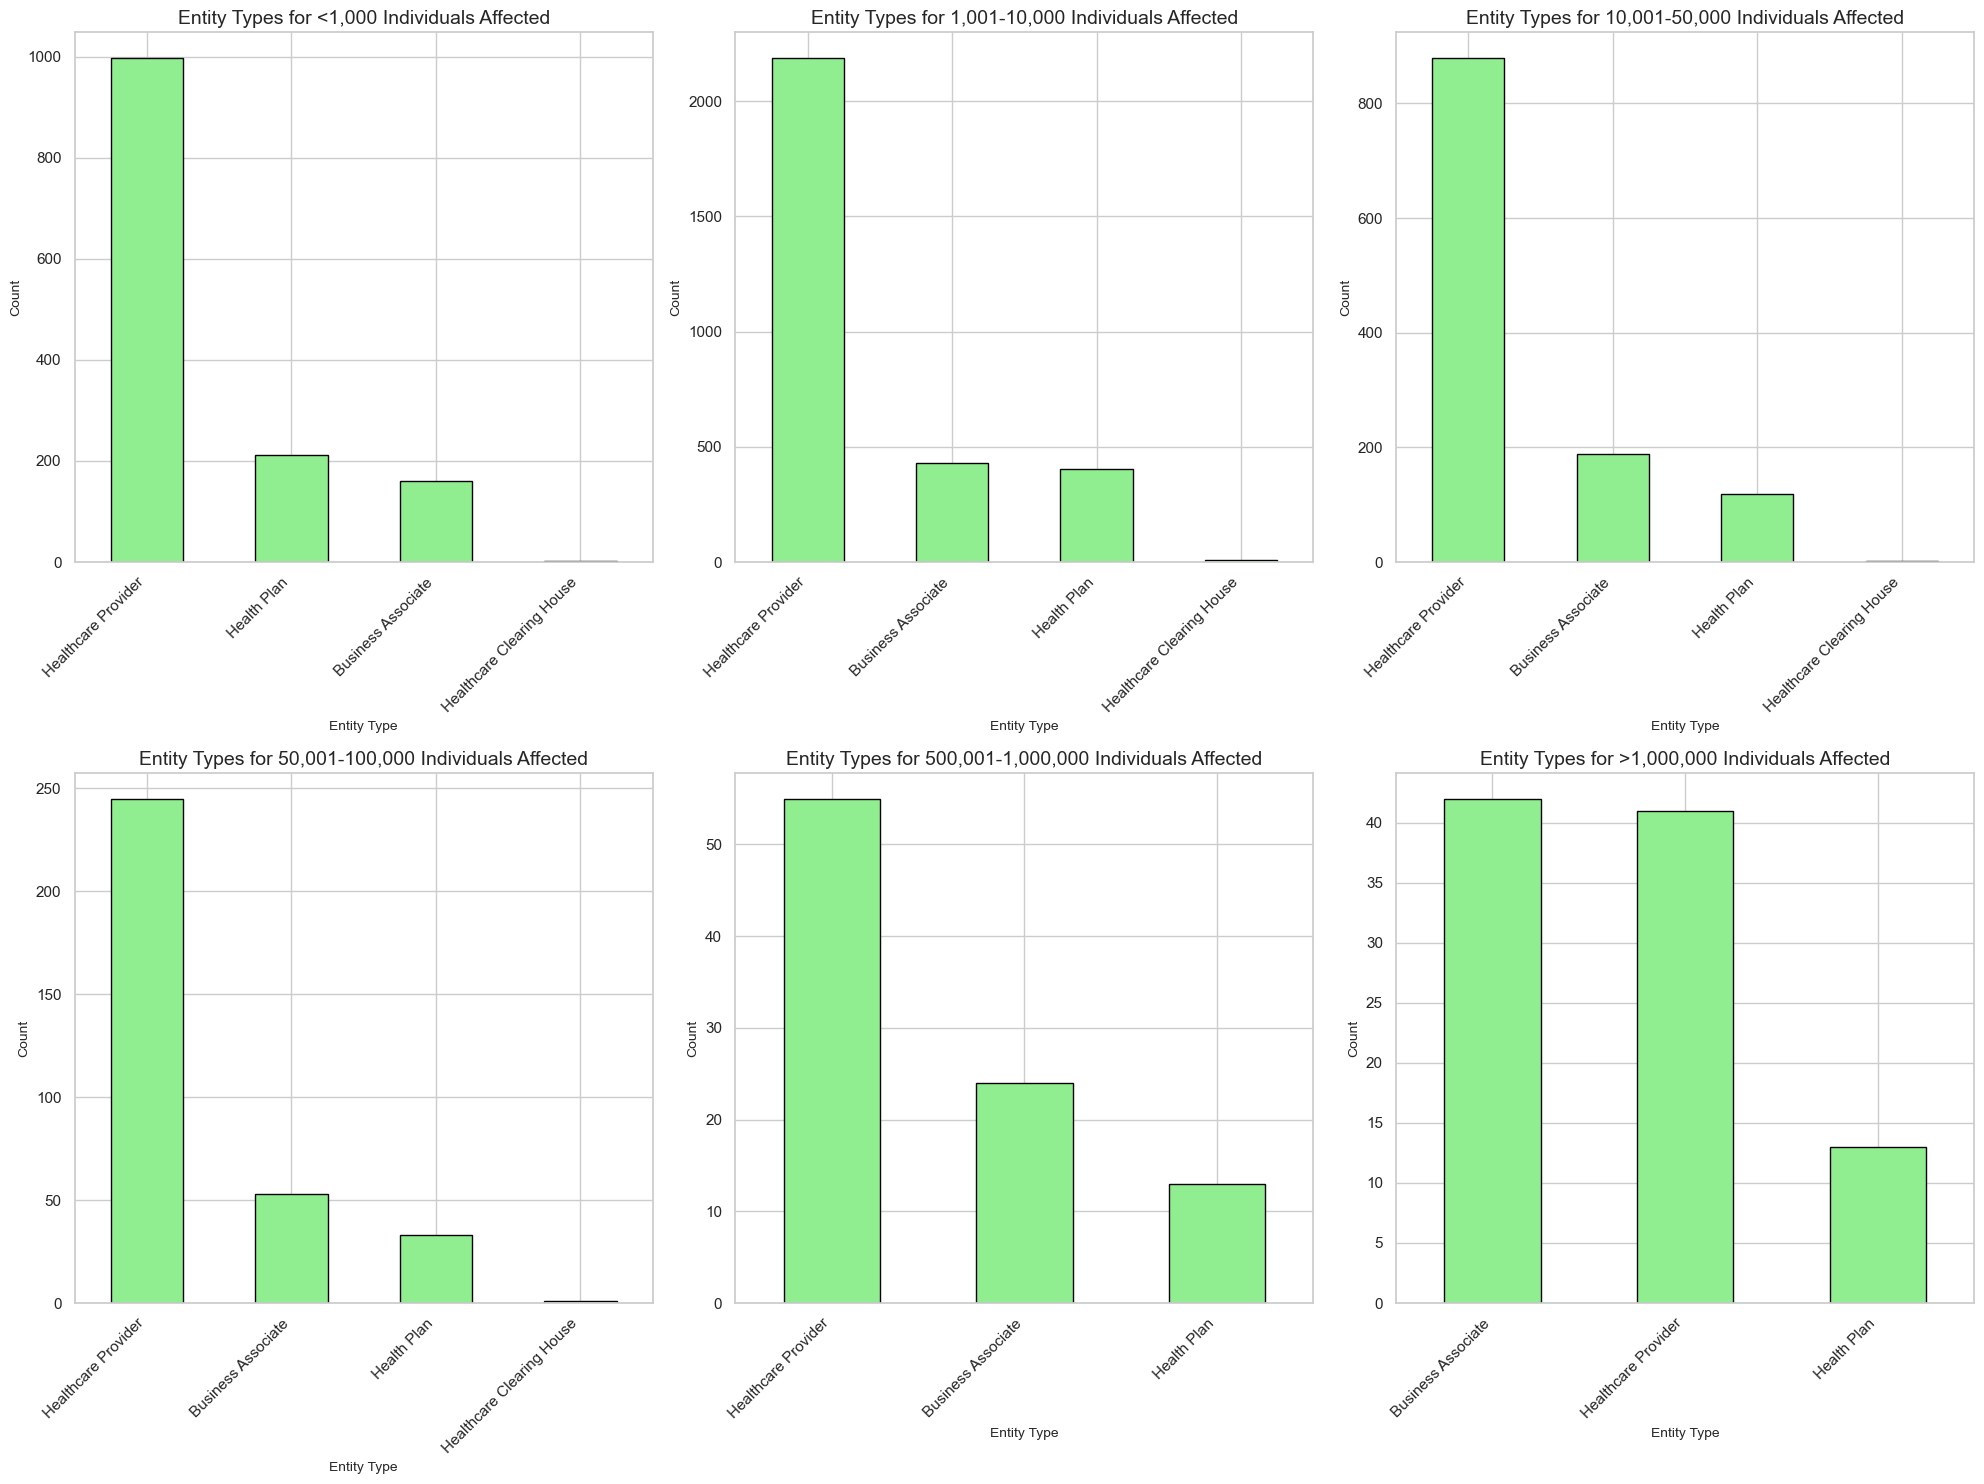

In [1835]:
# Plot bar charts for entity type counts in df1, df2, ..., df6
dataframes = [entity_df1, entity_df2, entity_df3, entity_df4, entity_df5, entity_df6]
titles = ['<1,000', '1,001-10,000', '10,001-50,000', '50,001-100,000', '500,001-1,000,000', '>1,000,000']

plt.figure(figsize=(20, 15))
for i, entity_df in enumerate(dataframes):
    plt.subplot(2, 3, i + 1)
    entity_df.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Entity Types for {titles[i]} Individuals Affected', fontsize=14)
    plt.xlabel('Entity Type', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comparison of Entity Types Across Dataframes:
                           <1,000  1,001-10,000  10,001-50,000  \
Entity Type                                                      
Business Associate            161           432            188   
Health Plan                   212           404            119   
Healthcare Clearing House       2             8              2   
Healthcare Provider           998          2190            880   

                           50,001-100,000  500,001-1,000,000  >1,000,000  
Entity Type                                                               
Business Associate                     53               24.0        42.0  
Health Plan                            33               13.0        13.0  
Healthcare Clearing House               1                0.0         0.0  
Healthcare Provider                   245               55.0        41.0  


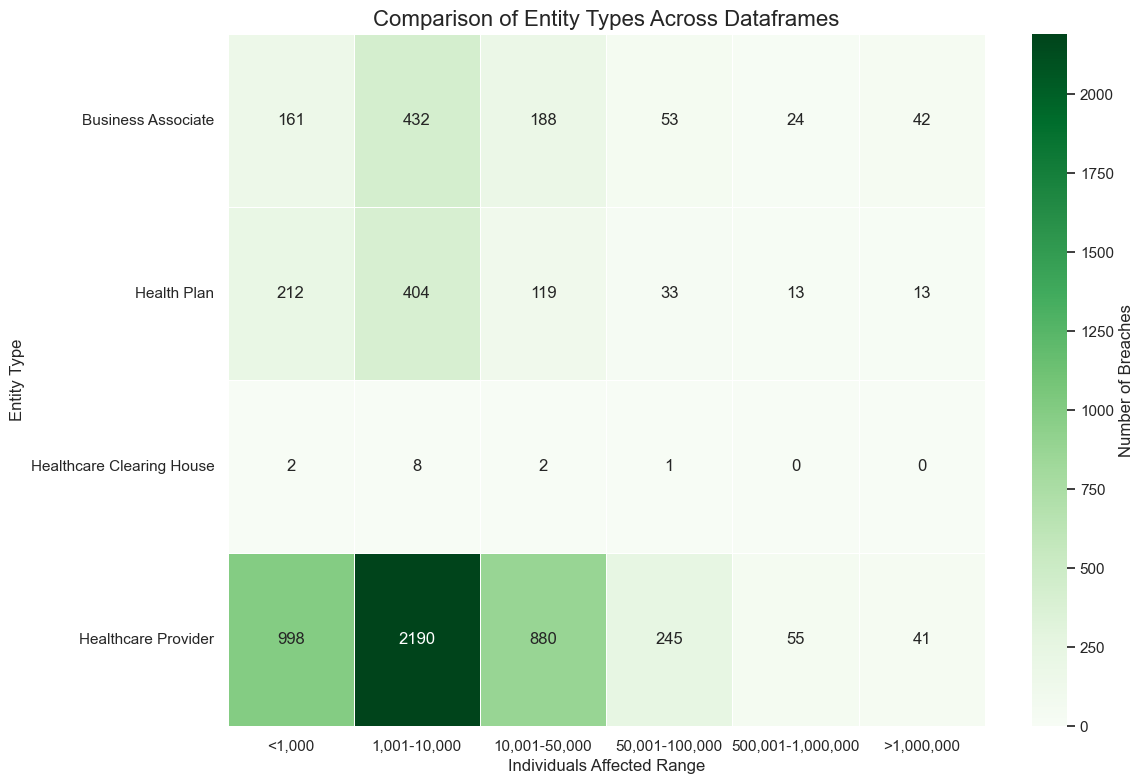

In [1836]:
# Combine entity type frequencies for each dataframe into a single DataFrame
entity_comparison = pd.DataFrame({
    '<1,000': entity_df1,
    '1,001-10,000': entity_df2,
    '10,001-50,000': entity_df3,
    '50,001-100,000': entity_df4,
    '500,001-1,000,000': entity_df5,
    '>1,000,000': entity_df6
}).fillna(0)

# Display the comparison
print("Comparison of Entity Types Across Dataframes:")
print(entity_comparison)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(entity_comparison, cmap='Greens', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Number of Breaches'})
plt.title('Comparison of Entity Types Across Dataframes', fontsize=16)
plt.xlabel('Individuals Affected Range', fontsize=12)
plt.ylabel('Entity Type', fontsize=12)
plt.tight_layout()
plt.show()


#### What is the average, median, and total number of individuals affected for each type of entity?

,Entity Type,Total_Individuals_Affected,Average_Individuals_Affected,Median_Individuals_Affected
0,Business Associate,319344434,320305.350050,5497.0
3,Healthcare Provider,248406322,52999.001920,3501.0
1,Health Plan,164082968,196742.167866,2870.0
2,Healthcare Clearing House,165089,12699.153846,2300.0


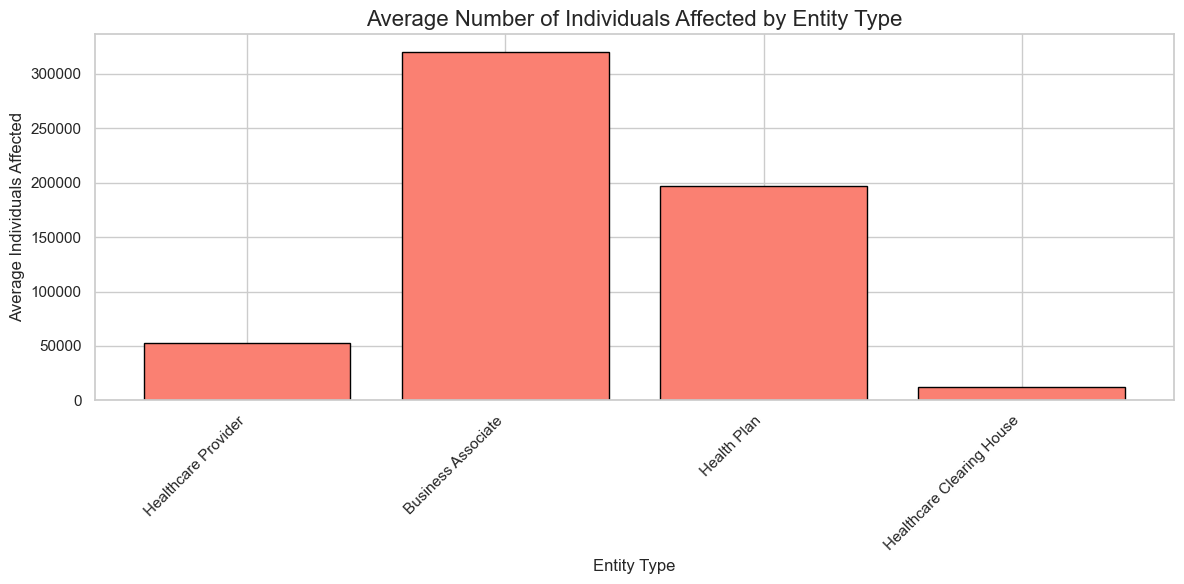

In [1838]:
# Determine which entity types has the highest impact on average individuals affected

# Aggregate data for each entity type
entity_stats = df_cleaned.groupby('Entity Type').agg(
    Total_Individuals_Affected=('Individuals Affected', 'sum'),  # Total number of individuals affected
    Average_Individuals_Affected=('Individuals Affected', 'mean'),  # Average number of individuals affected
    Median_Individuals_Affected=('Individuals Affected', 'median')  # Median number of individuals affected
).reset_index()

# Sort by Total_Individuals_Affected for better readability
entity_stats = entity_stats.sort_values(by='Total_Individuals_Affected', ascending=False)

# Display the results
display(entity_stats)

# Bar chart for average individuals affected
plt.figure(figsize=(12, 6))
plt.bar(entity_summary['Entity Type'], entity_summary['Avg_Individuals_Affected'], color='salmon', edgecolor='black')
plt.title('Average Number of Individuals Affected by Entity Type', fontsize=16)
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Average Individuals Affected', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### What is the comparison of breach frequency and impact between the different entities?

,Entity Type,Total_Individuals_Affected,Average_Individuals_Affected,Median_Individuals_Affected,Breach_Count,Avg_Impact_Per_Breach
0,Business Associate,319344434,320305.350050,5497.0,997,320305.350050
3,Healthcare Provider,248406322,52999.001920,3501.0,4687,52999.001920
1,Health Plan,164082968,196742.167866,2870.0,834,196742.167866
2,Healthcare Clearing House,165089,12699.153846,2300.0,13,12699.153846


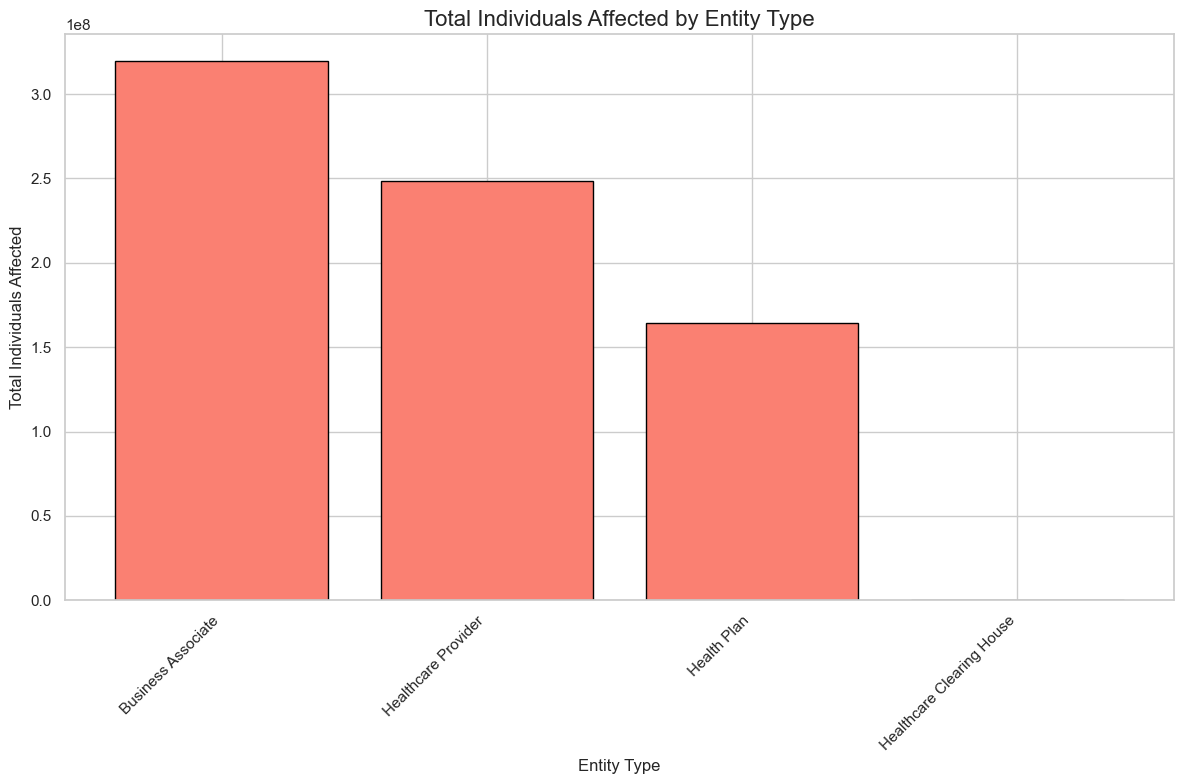

In [1840]:
# Add breach count to the statistics
entity_stats['Breach_Count'] = df_cleaned['Entity Type'].value_counts().reindex(entity_stats['Entity Type']).values

# Calculate average impact per breach for better insights
entity_stats['Avg_Impact_Per_Breach'] = (
    entity_stats['Total_Individuals_Affected'] / entity_stats['Breach_Count']
)

# Display the comparison
display(entity_stats)

# Customize visual plot
plt.figure(figsize=(12, 8))
plt.bar(entity_stats['Entity Type'], entity_stats['Total_Individuals_Affected'], color='salmon', edgecolor='black')
plt.title('Total Individuals Affected by Entity Type', fontsize=16)
plt.xlabel('Entity Type', fontsize=12)
plt.ylabel('Total Individuals Affected', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,Entity Type,Total_Individuals_Affected,Breach_Count,Avg_Impact_Per_Breach,Category
0,Business Associate,110359,161,6.854596e+02,"<1,000"
1,Health Plan,152805,212,7.207783e+02,"<1,000"
2,Healthcare Clearing House,1001,2,5.005000e+02,"<1,000"
3,Healthcare Provider,698904,998,7.003046e+02,"<1,000"
0,Business Associate,1550705,432,3.589595e+03,"1,001-10,000"
1,Health Plan,1511180,404,3.740545e+03,"1,001-10,000"
2,Healthcare Clearing House,24984,8,3.123000e+03,"1,001-10,000"
3,Healthcare Provider,7704499,2190,3.518036e+03,"1,001-10,000"
0,Business Associate,4387411,188,2.333729e+04,"10,001-50,000"
1,Health Plan,2802021,119,2.354639e+04,"10,001-50,000"


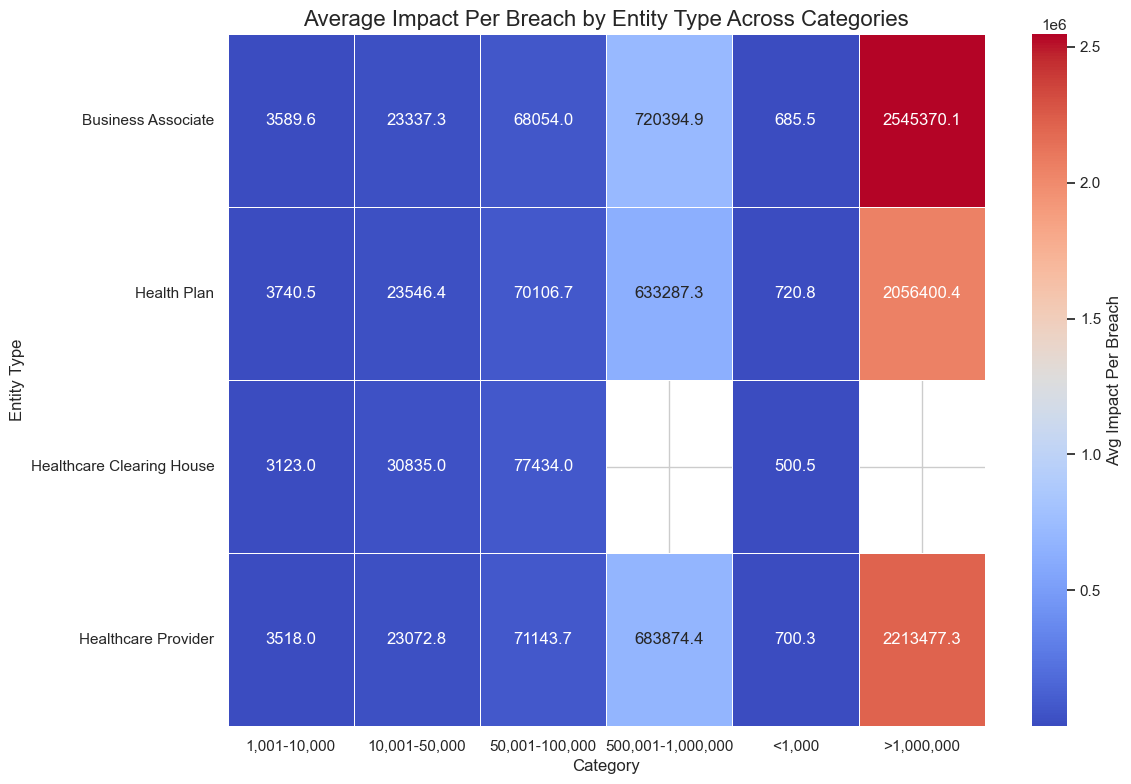

In [1841]:
# Analyze the average impact varies by entity for each of the categories that are defined earlier (df1, df2, etc)

# Combine stats into a single dataframe for comparison
combined_stats = pd.concat([
    entity_stats_df1.assign(Category='<1,000'),
    entity_stats_df2.assign(Category='1,001-10,000'),
    entity_stats_df3.assign(Category='10,001-50,000'),
    entity_stats_df4.assign(Category='50,001-100,000'),
    entity_stats_df5.assign(Category='500,001-1,000,000'),
    entity_stats_df6.assign(Category='>1,000,000')
])

# Display combined stats
display(combined_stats)

# Heatmap for average impact per breach across categories
pivot_avg_impact = combined_stats.pivot(index='Entity Type', columns='Category', values='Avg_Impact_Per_Breach')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_avg_impact, cmap='coolwarm', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Avg Impact Per Breach'})
plt.title('Average Impact Per Breach by Entity Type Across Categories', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Entity Type', fontsize=12)
plt.tight_layout()
plt.show()

### Which locations are most frequently breached?

In [1843]:
# Count the number of breaches for each unique location in the Location of Breach Location column.

# Count the number of breaches for each location
breach_location_counts = df_cleaned['Breach Location'].value_counts()

# Display the results
print("Breach Locations (Overall):")
print(breach_location_counts)

Breach Locations (Overall):
Breach Location
Network Server                      2522
Email                               1467
Paper/Films                          853
Laptop                               423
Desktop Computer                     369
Electronic Medical Record            353
Other                                347
Other Portable Electronic Device     197
Name: count, dtype: int64


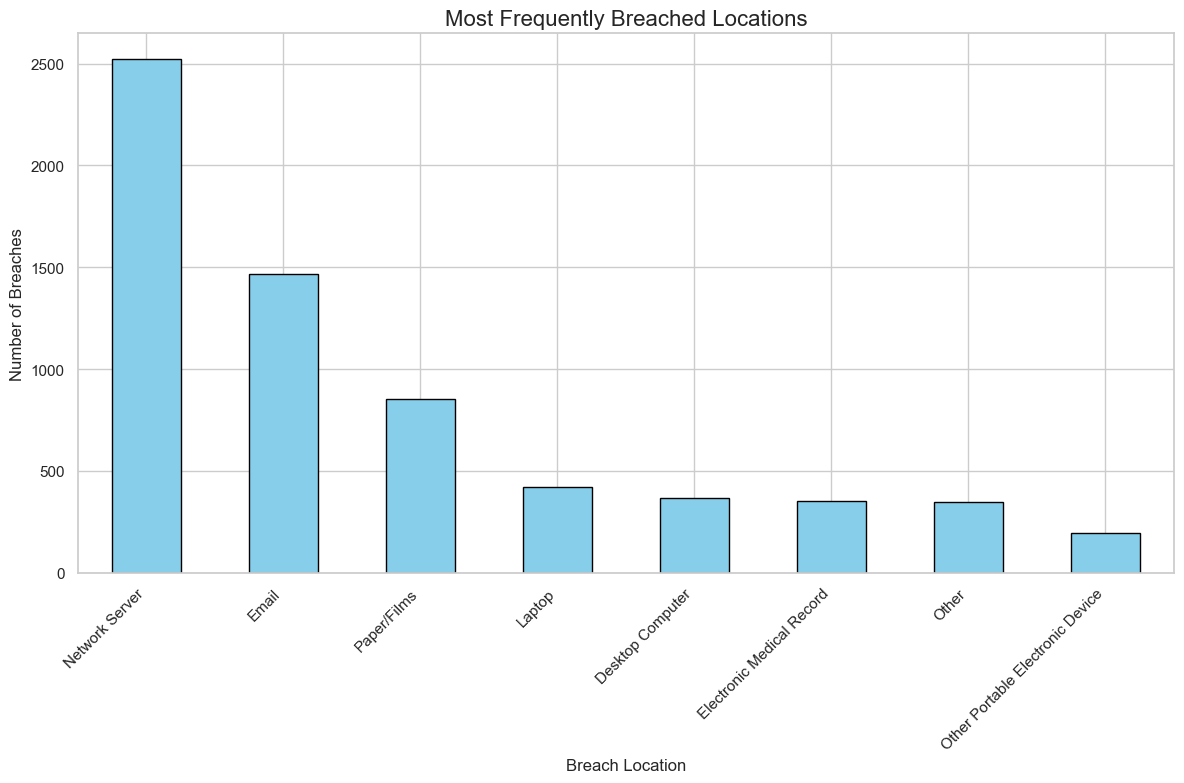

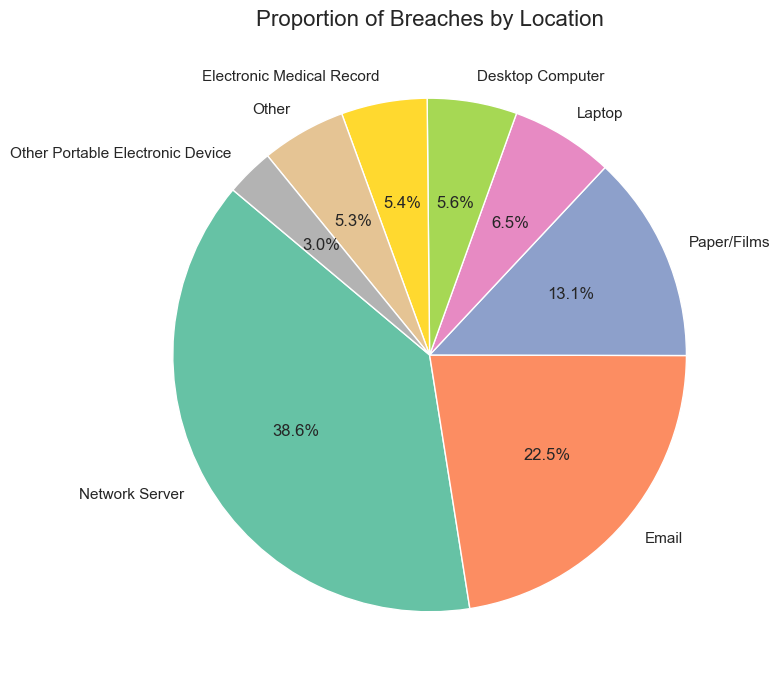

In [1844]:
# Bar chart for breach locations
plt.figure(figsize=(12, 8))
breach_location_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Most Frequently Breached Locations', fontsize=16)
plt.xlabel('Breach Location', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie chart for breach locations
plt.figure(figsize=(8, 8))
breach_location_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set2')
plt.title('Proportion of Breaches by Location', fontsize=16)
plt.ylabel('')  # Remove y-axis label for better appearance
plt.tight_layout()
plt.show()


In [1845]:
# Calculate percentage contribution of each location
breach_location_summary = breach_location_counts.reset_index()
breach_location_summary.columns = ['Location', 'Breach_Count']
breach_location_summary['Percentage'] = (breach_location_summary['Breach_Count'] / breach_location_summary['Breach_Count'].sum()) * 100
breach_location_summary['Cumulative_Percentage'] = breach_location_summary['Percentage'].cumsum()

# Display the summary
print("Breach Location Summary:")
display(breach_location_summary)

Breach Location Summary:


,Location,Breach_Count,Percentage,Cumulative_Percentage
0,Network Server,2522,38.615832,38.615832
1,Email,1467,22.462104,61.077936
2,Paper/Films,853,13.060787,74.138723
3,Laptop,423,6.476803,80.615526
4,Desktop Computer,369,5.649977,86.265503
5,Electronic Medical Record,353,5.404992,91.670495
6,Other,347,5.313122,96.983617
7,Other Portable Electronic Device,197,3.016383,100.000000


#### How does it differ for the various breach size categories?

In [1847]:
# Function to count breach frequency by location for a given dataframe
def breach_location_analysis(df):
    return df['Breach Location'].value_counts()

# Analyze breach locations for each dataframe
location_df1 = breach_location_analysis(df1)
location_df2 = breach_location_analysis(df2)
location_df3 = breach_location_analysis(df3)
location_df4 = breach_location_analysis(df4)
location_df5 = breach_location_analysis(df5)
location_df6 = breach_location_analysis(df6_final)

# Display the results for each dataframe
print("Breach Locations for df1 (<1,000):")
print(location_df1)

print("\nBreach Locations for df2 (1,001-10,000):")
print(location_df2)

print("\nBreach Locations for df3 (10,001-50,000):")
print(location_df3)

print("\nBreach Locations for df4 (50,001-100,000):")
print(location_df4)

print("\nBreach Locations for df5 (500,001-1,000,000):")
print(location_df5)

print("\nBreach Locations for df6 (>1,000,000):")
print(location_df6)


Breach Locations for df1 (<1,000):
Breach Location
Network Server                      326
Paper/Films                         317
Email                               296
Laptop                              122
Desktop Computer                     99
Other                                86
Electronic Medical Record            80
Other Portable Electronic Device     47
Name: count, dtype: int64

Breach Locations for df2 (1,001-10,000):
Breach Location
Network Server                      970
Email                               723
Paper/Films                         452
Laptop                              224
Other                               193
Desktop Computer                    185
Electronic Medical Record           170
Other Portable Electronic Device    117
Name: count, dtype: int64

Breach Locations for df3 (10,001-50,000):
Breach Location
Network Server                      572
Email                               294
Electronic Medical Record            74
Paper/Films         

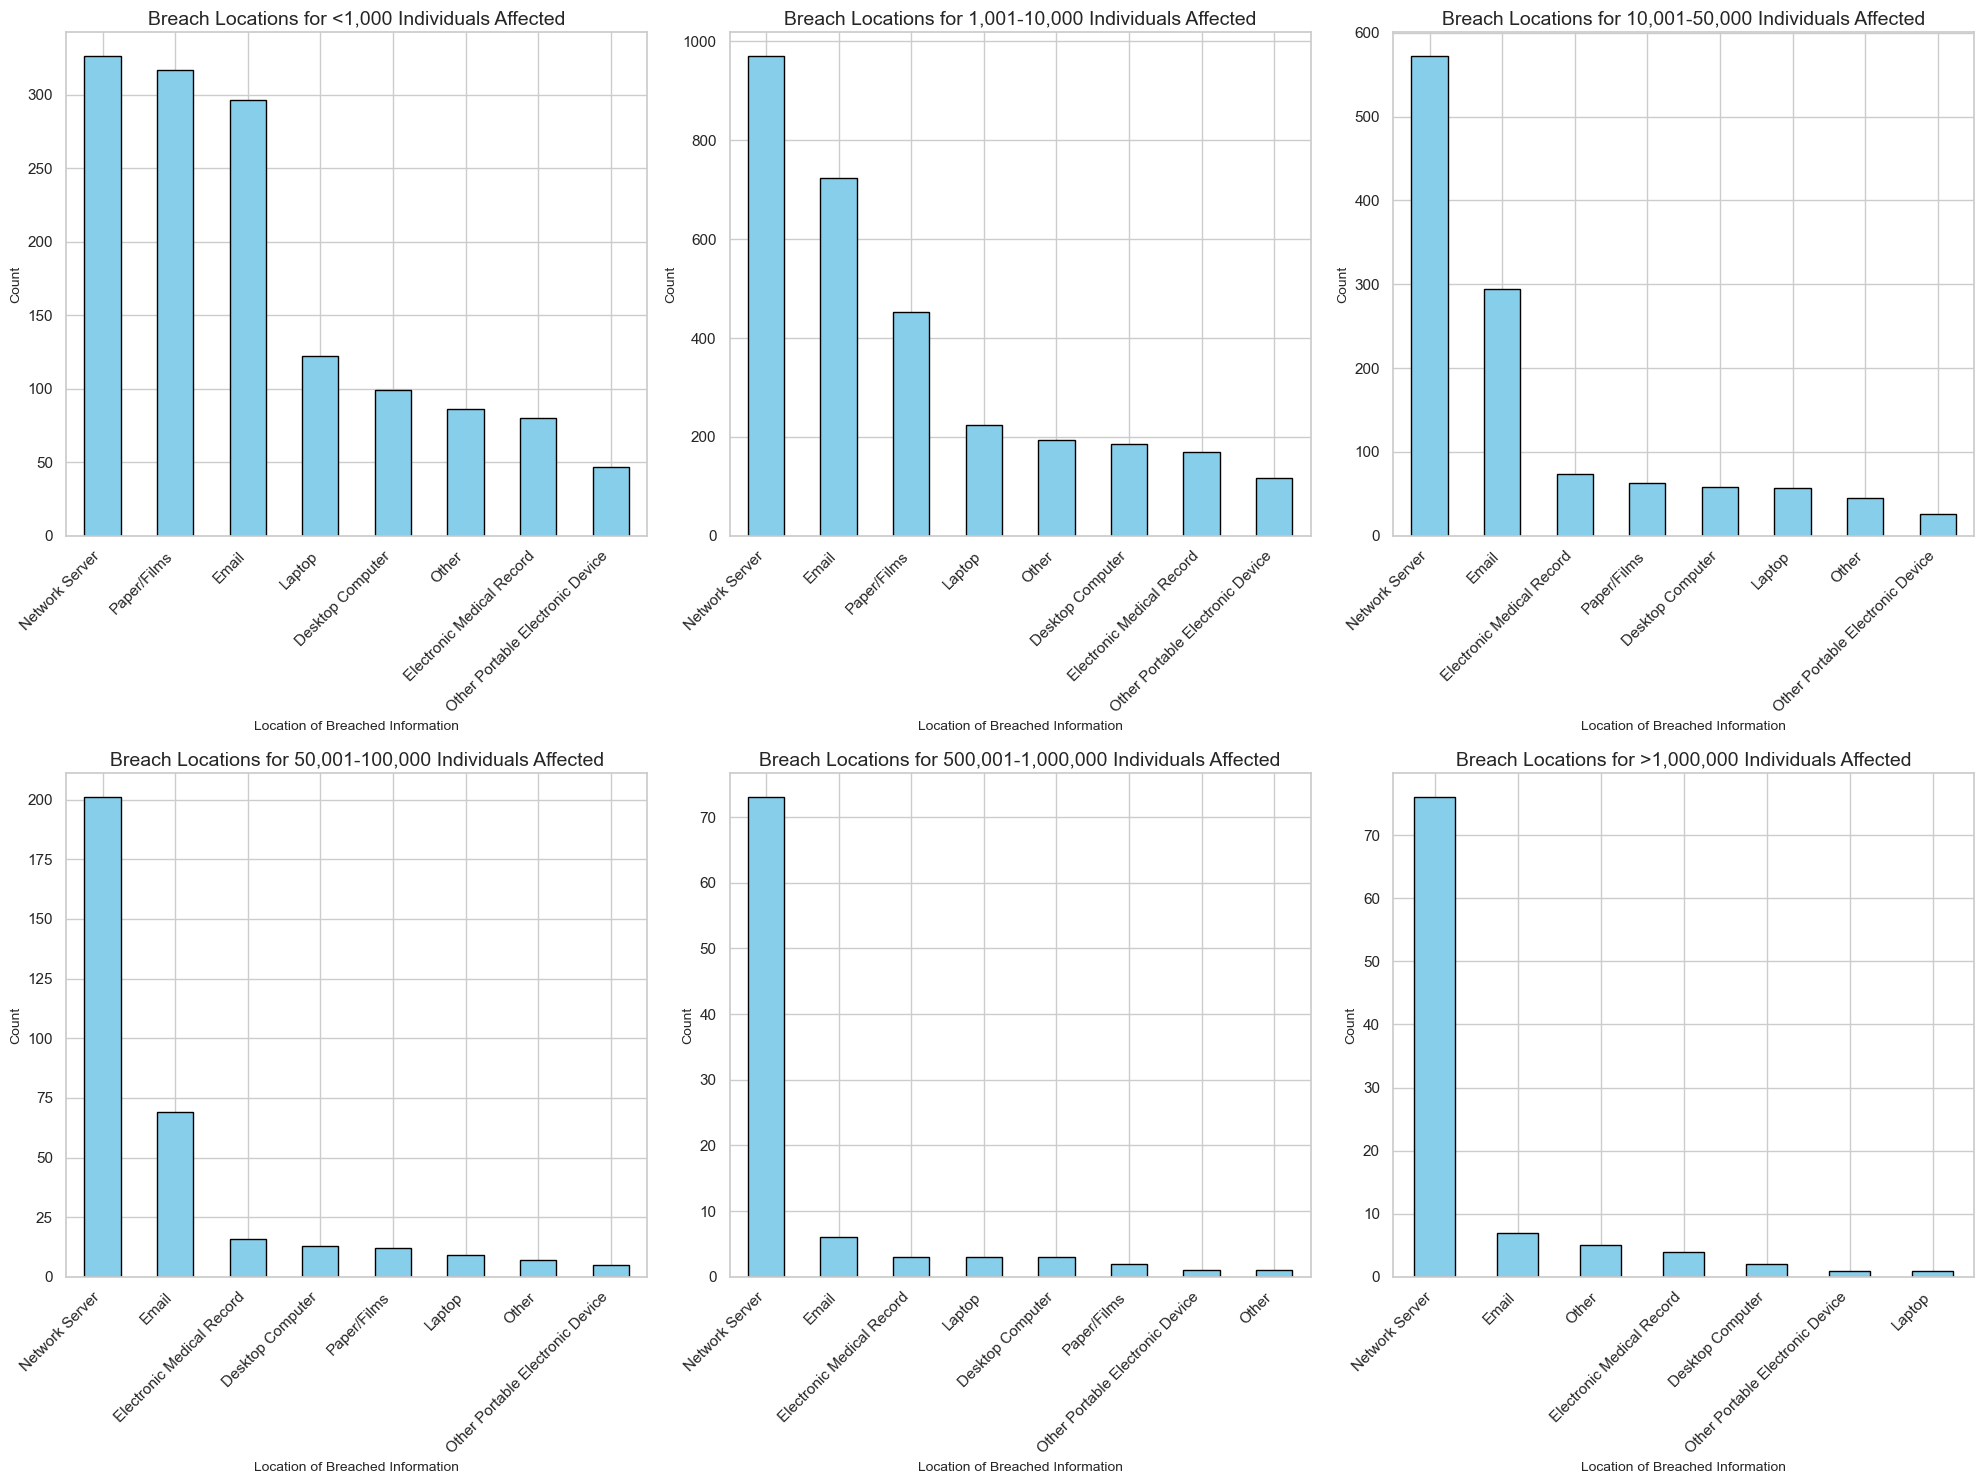

In [1848]:
# Plot bar charts for breach locations in df1, df2, ..., df6
dataframes = [location_df1, location_df2, location_df3, location_df4, location_df5, location_df6]
titles = ['<1,000', '1,001-10,000', '10,001-50,000', '50,001-100,000', '500,001-1,000,000', '>1,000,000']

plt.figure(figsize=(20, 15))
for i, location_df in enumerate(dataframes):
    plt.subplot(2, 3, i + 1)
    location_df.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Breach Locations for {titles[i]} Individuals Affected', fontsize=14)
    plt.xlabel('Location of Breached Information', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Comparison of Breach Locations Across Dataframes:
                                  <1,000  1,001-10,000  10,001-50,000  \
Breach Location                                                         
Desktop Computer                      99           185             58   
Electronic Medical Record             80           170             74   
Email                                296           723            294   
Laptop                               122           224             57   
Network Server                       326           970            572   
Other                                 86           193             45   
Other Portable Electronic Device      47           117             26   
Paper/Films                          317           452             63   

                                  50,001-100,000  500,001-1,000,000  \
Breach Location                                                       
Desktop Computer                              13                  3   
Electr

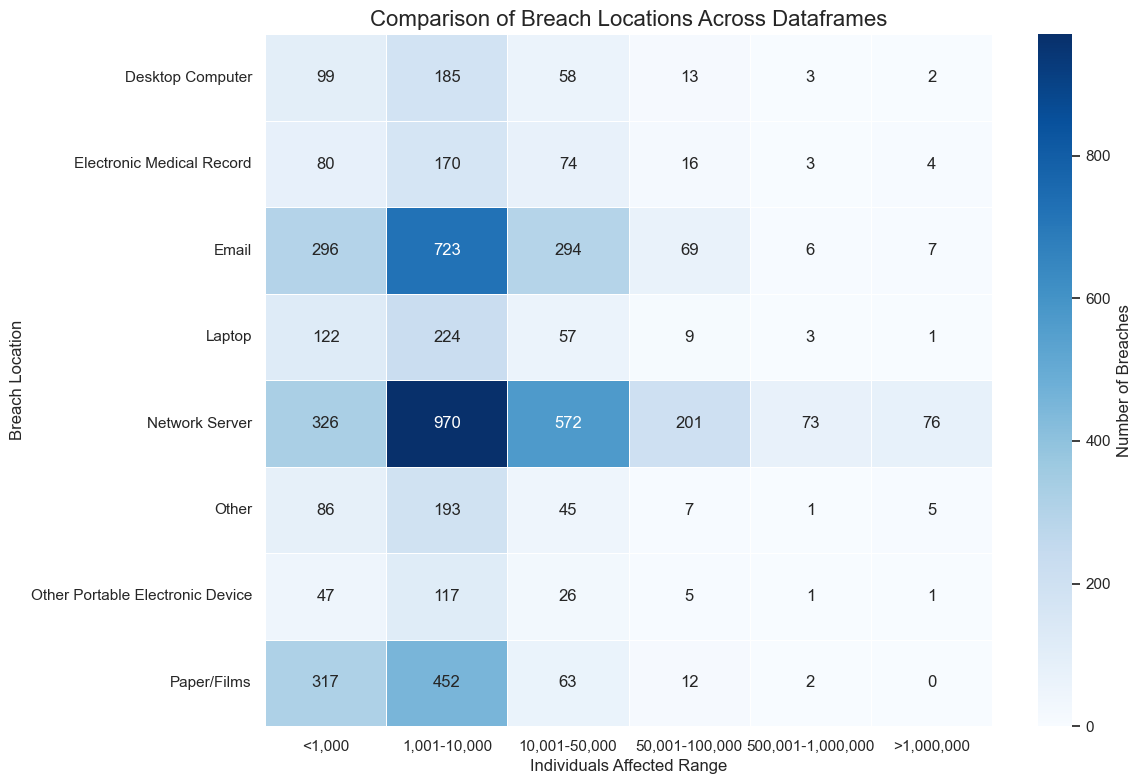

In [1849]:
# Generate a heatmap for easier visualization

# Combine location frequencies for each dataframe into a single DataFrame
location_comparison = pd.DataFrame({
    '<1,000': location_df1,
    '1,001-10,000': location_df2,
    '10,001-50,000': location_df3,
    '50,001-100,000': location_df4,
    '500,001-1,000,000': location_df5,
    '>1,000,000': location_df6
}).fillna(0)

# Display the comparison
print("Comparison of Breach Locations Across Dataframes:")
print(location_comparison)

# Heatmap visualization of comparison of breach locations across the different data frame groups
plt.figure(figsize=(12, 8))
sns.heatmap(location_comparison, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5, cbar_kws={'label': 'Number of Breaches'})
plt.title('Comparison of Breach Locations Across Dataframes', fontsize=16)
plt.xlabel('Individuals Affected Range', fontsize=12)
plt.ylabel('Breach Location', fontsize=12)
plt.tight_layout()
plt.show()

### Are certain locations of breached information associated with higher number of individuals affected?

In [1851]:
# Calculate summary statistics (mean, median, sum, count) of individuals affected for each breach location

# Group by 'Location of Breached Information' and calculate statistics
location_impact = df_cleaned.groupby('Breach Location')['Individuals Affected'].agg(
    Breach_Count='count',
    Total_Affected='sum',
    Average_Affected='mean',
    Median_Affected='median'
).reset_index()

# Sort by Total_Affected for better interpretation
location_impact = location_impact.sort_values(by='Total_Affected', ascending=False)

# Display the results
display(location_impact)

,Breach Location,Breach_Count,Total_Affected,Average_Affected,Median_Affected
4,Network Server,2522,627190023,248687.558684,9196.5
2,Email,1467,43684507,29778.123381,3525.0
1,Electronic Medical Record,353,16118431,45661.277620,2864.0
5,Other,347,15191227,43778.752161,2500.0
0,Desktop Computer,369,12851766,34828.634146,2450.0
3,Laptop,423,7372682,17429.508274,2300.0
7,Paper/Films,853,6166795,7229.536928,1445.0
6,Other Portable Electronic Device,197,3423382,17377.573604,2477.0


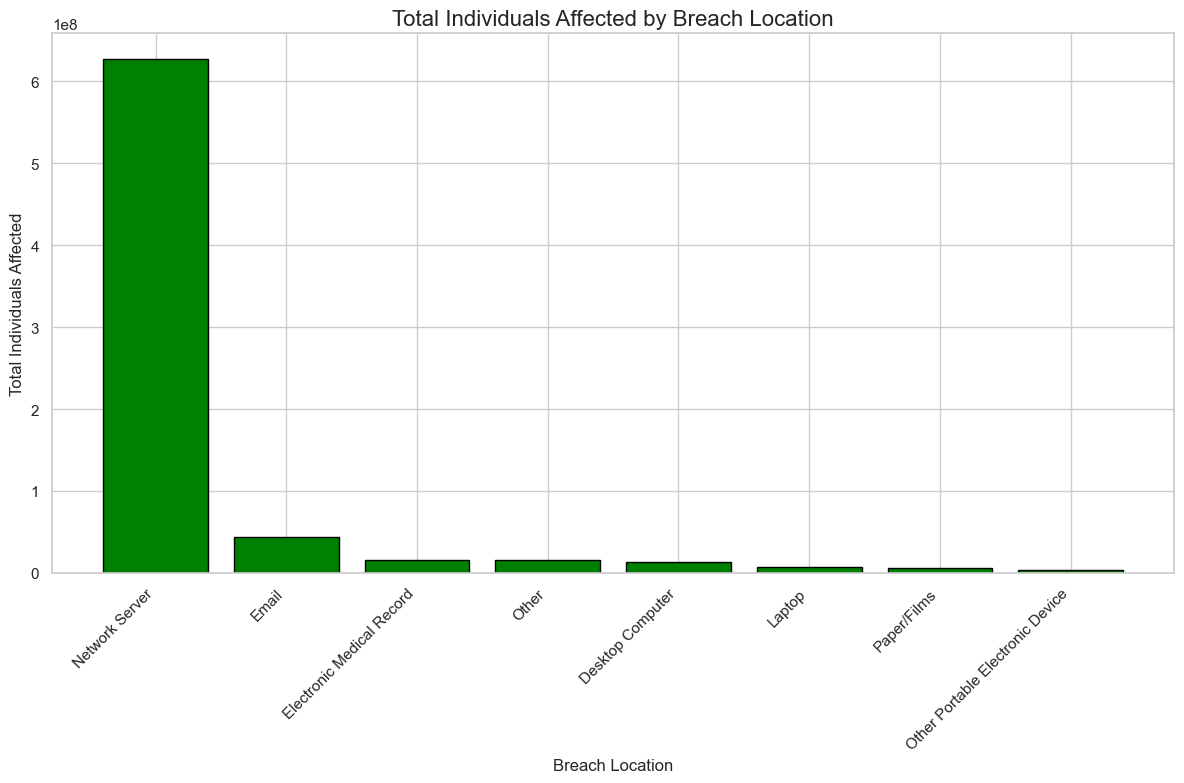

In [1852]:
# Highlight the total impact of breaches for each location
plt.figure(figsize=(12, 8))
plt.bar(location_impact['Breach Location'], location_impact['Total_Affected'], color='green', edgecolor='black')
plt.title('Total Individuals Affected by Breach Location', fontsize=16)
plt.xlabel('Breach Location', fontsize=12)
plt.ylabel('Total Individuals Affected', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

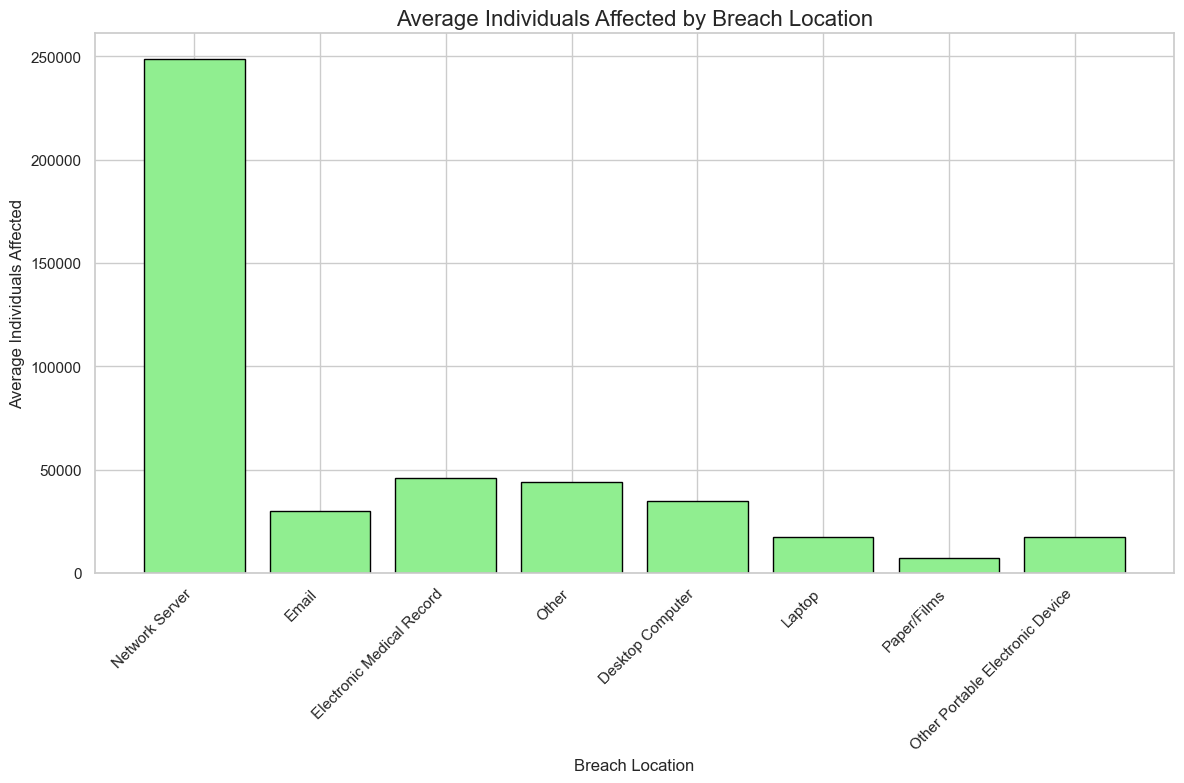

In [1853]:
# Show which locations tend to have the largest average breaches
plt.figure(figsize=(12, 8))
plt.bar(location_impact['Breach Location'], location_impact['Average_Affected'], color='lightgreen', edgecolor='black')
plt.title('Average Individuals Affected by Breach Location', fontsize=16)
plt.xlabel('Breach Location', fontsize=12)
plt.ylabel('Average Individuals Affected', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### How does the number of individuals affected vary within each category when looking at the breach location?

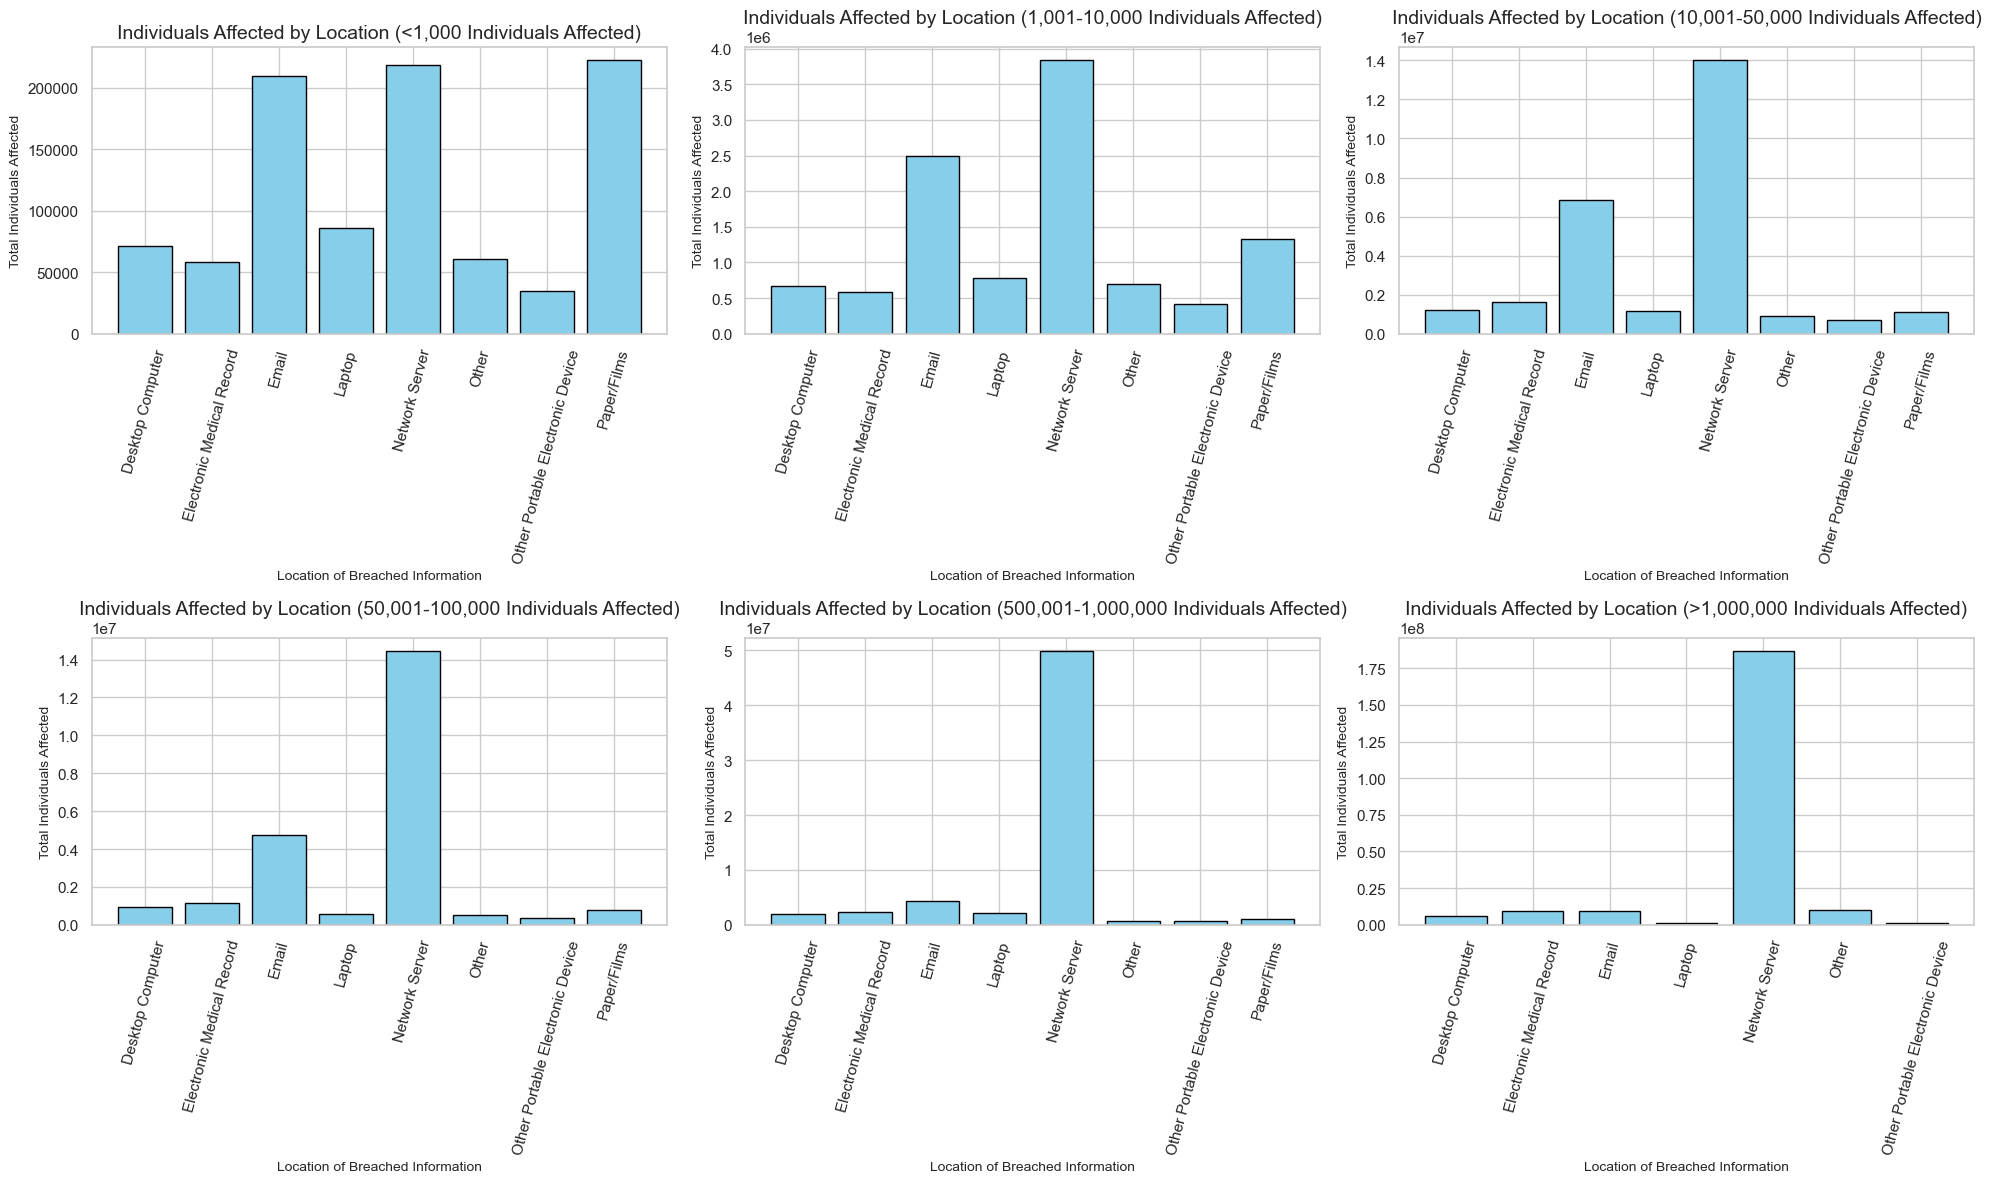

In [1855]:
# List of dataframes and their corresponding titles
dataframes = [
    (df1, '<1,000 Individuals Affected'),
    (df2, '1,001-10,000 Individuals Affected'),
    (df3, '10,001-50,000 Individuals Affected'),
    (df4, '50,001-100,000 Individuals Affected'),
    (df5, '500,001-1,000,000 Individuals Affected'),
    (df6_final, '>1,000,000 Individuals Affected')
]

# Set up the subplot grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration

# Loop through dataframes and plot each on a separate subplot
for i, (df, title) in enumerate(dataframes):
    # Aggregate data by location
    location_stats = df.groupby('Breach Location')['Individuals Affected'].sum()
    
    # Plot the data on the corresponding subplot
    axes[i].bar(location_stats.index, location_stats.values, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Individuals Affected by Location ({title})', fontsize=14)
    axes[i].set_xlabel('Location of Breached Information', fontsize=10)
    axes[i].set_ylabel('Total Individuals Affected', fontsize=10)
    axes[i].tick_params(axis='x', rotation=75)

# Adjust layout
plt.tight_layout()
plt.show()

### Is There a Correlation Between Individuals Affected and Breach Type?

In [1857]:
# Carry out the descriptive statistics

# Calculate the mean, median, and variance of individuals affected for each breach type.
breach_type_stats = df_cleaned.groupby('Type of Breach')['Individuals Affected'].describe()
print("Descriptive Statistics by Breach Type:")
display(breach_type_stats)

Descriptive Statistics by Breach Type:


,count,mean,std,min,25%,50%,75%,max
Type of Breach,,,,,,,,
Hacking/IT Incident,3593.0,179229.609797,2.222057e+06,500.0,1965.00,7678.0,39825.0,100000000.0
Improper Disposal,120.0,17610.833333,6.540549e+04,500.0,1000.00,1879.5,5097.0,550000.0
Loss,234.0,40694.290598,3.415492e+05,500.0,830.00,1892.0,4705.5,4900000.0
Other,92.0,15975.586957,4.322638e+04,504.0,1028.50,2044.5,9893.0,315000.0
Theft,1018.0,26496.041257,2.118596e+05,500.0,927.25,2165.5,6274.0,4500000.0
Unauthorized Access/Disclosure,1464.0,31442.381148,3.894542e+05,500.0,867.50,1716.5,5052.0,13400000.0
Unknown,10.0,191669.100000,6.002497e+05,551.0,924.50,1132.0,2347.0,1900000.0


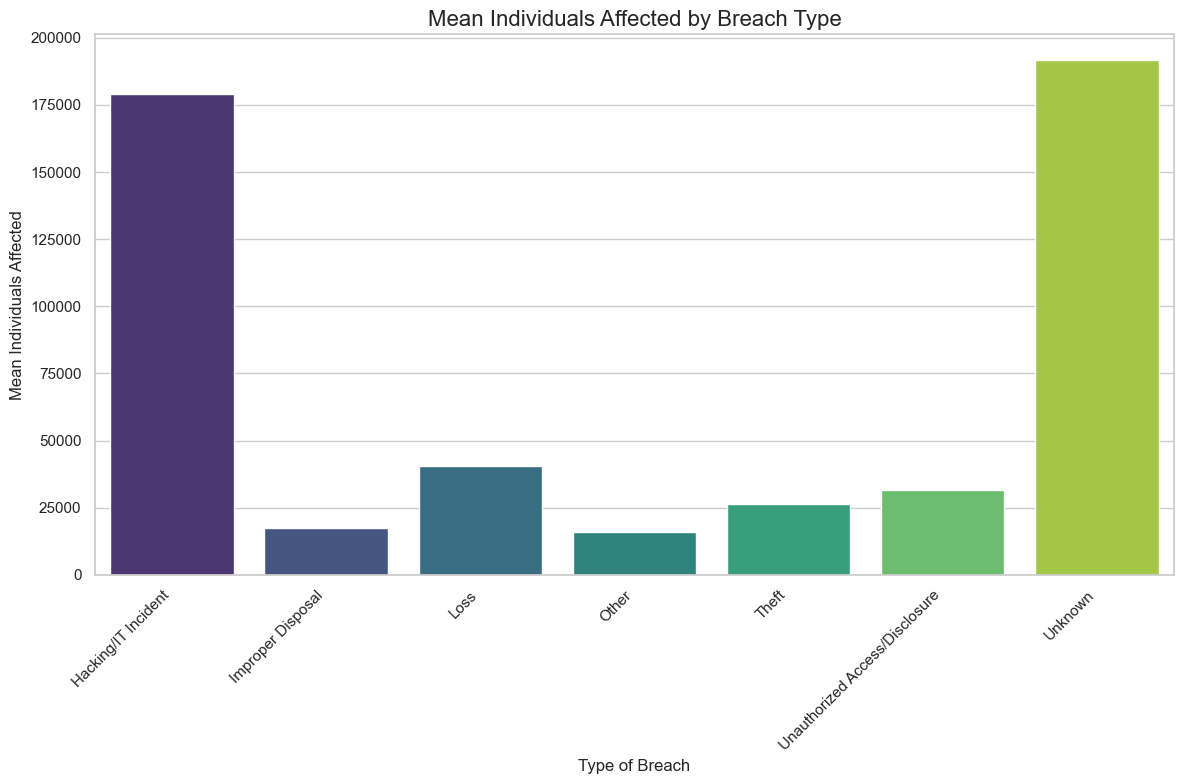

In [1858]:
# Visualize mean individuals affected per breach type
breach_means = df_cleaned.groupby('Type of Breach')['Individuals Affected'].mean()
plt.figure(figsize=(12, 8))
sns.barplot(x=breach_means.index, y=breach_means.values, palette="viridis")
plt.title("Mean Individuals Affected by Breach Type", fontsize=16)
plt.xlabel("Type of Breach", fontsize=12)
plt.ylabel("Mean Individuals Affected", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [1859]:
# Test whether the mean number of individuals affected varies significantly across breach types

# ANOVA
anova_groups = [group['Individuals Affected'].values for _, group in df_cleaned.groupby('Type of Breach')]
anova_stat, anova_p = f_oneway(*anova_groups)
print(f"ANOVA F-statistic: {anova_stat}, p-value: {anova_p}")

# Interpretation
if anova_p < 0.05:
    print("There is a significant difference in the number of individuals affected and the type of breach.")
else:
    print("No significant difference in the number of individuals affected and the type of breach.")

ANOVA F-statistic: 2.191847459973678, p-value: 0.04083748971987037
There is a significant difference in the number of individuals affected and the type of breach.


In [1860]:
# Use Pearson’s correlation if breach types are encoded numerically
# Pearson Correlation (factorizing breach types numerically)
breach_type_encoded = df_cleaned['Type of Breach'].factorize()[0]
pearson_corr, pearson_p = pearsonr(breach_type_encoded, df_cleaned['Individuals Affected'])
print(f"Pearson Correlation: {pearson_corr}, p-value: {pearson_p}")

# Interpretation
if pearson_p < 0.05:
    if abs(pearson_corr) > 0.7:
        print(f"Strong correlation (r = {pearson_corr:.2f}) between individuals affected and the type of breach. The result is statistically significant (p = {pearson_p:.3f}).")
    elif abs(pearson_corr) > 0.3:
        print(f"Moderate correlation (r = {pearson_corr:.2f}) between individuals affected and the type of breach. The result is statistically significant (p = {pearson_p:.3f}).")
    else:
        print(f"Weak correlation (r = {pearson_corr:.2f}) between individuals affected and the type of breach. The result is statistically significant (p = {pearson_p:.3f}).")
else:
    print(f"No significant correlation (r = {pearson_corr:.2f}, p = {pearson_p:.3f}).")

Pearson Correlation: -0.03451279467169337, p-value: 0.0052800116751707
Weak correlation (r = -0.03) between individuals affected and the type of breach. The result is statistically significant (p = 0.005).


In [1861]:
# Chi-Square Test (if categories are used for Individuals Affected)
df_cleaned['Affected Category'] = pd.cut(df_cleaned['Individuals Affected'], bins=[0, 50000, 100000, float('inf')],
                                         labels=['Small', 'Medium', 'Large'])
chi2_contingency_table = pd.crosstab(df_cleaned['Type of Breach'], df_cleaned['Affected Category'])
chi2_stat, chi2_p, _, _ = chi2_contingency(chi2_contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {chi2_p}")

# Interpretation
if chi2_p < 0.05:
    print(f"There is a significant association between the individuals affected and the type of breach (Chi2 = {chi2_stat:.2f}, p = {chi2_p:.3f}).")
else:
    print(f"No significant association between the individuals affected and the type of breach (Chi2 = {chi2_stat:.2f}, p = {chi2_p:.3f}).")

Chi-Square Statistic: 400.5814259199092, p-value: 2.8503243219580115e-78
There is a significant association between the individuals affected and the type of breach (Chi2 = 400.58, p = 0.000).


In [1862]:
# Perform Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(*anova_groups)
print(f"Kruskal-Wallis Statistic: {kruskal_stat}, p-value: {kruskal_p}")

if kruskal_p < 0.05:
    print("There is a significant difference in the distribution of individuals affected across breach types (non-parametric).")
else:
    print("No significant difference in the distribution of individuals affected across breach types (non-parametric).")


Kruskal-Wallis Statistic: 772.3098052287471, p-value: 1.4784242000872096e-163
There is a significant difference in the distribution of individuals affected across breach types (non-parametric).


### Is There a Correlation Between Individuals Affected and Location of the Breach?

In [1864]:
# Summarize the impact of breaches (mean, median, etc.) for each location

# Descriptive statistics for individuals affected by breach location
location_stats = df_cleaned.groupby('Breach Location')['Individuals Affected'].describe()
print("Descriptive Statistics by Breach Location:")
display(location_stats)

Descriptive Statistics by Breach Location:


,count,mean,std,min,25%,50%,75%,max
Breach Location,,,,,,,,
Desktop Computer,369.0,34828.634146,2.437941e+05,500.0,981.00,2450.0,9626.0,4029530.0
Electronic Medical Record,353.0,45661.277620,2.784558e+05,500.0,1140.00,2864.0,12331.0,3500000.0
Email,1467.0,29778.123381,1.177473e+05,500.0,1188.00,3525.0,14756.5,1868831.0
Laptop,423.0,17429.508274,8.991226e+04,500.0,934.50,2300.0,6684.0,1220000.0
Network Server,2522.0,248687.558684,2.663570e+06,500.0,2018.75,9196.5,54833.0,100000000.0
Other,347.0,43778.752161,3.029445e+05,500.0,1016.00,2500.0,7463.0,4900000.0
Other Portable Electronic Device,197.0,17377.573604,1.016982e+05,507.0,1015.00,2477.0,6190.0,1245218.0
Paper/Films,853.0,7229.536928,3.656942e+04,500.0,771.00,1445.0,3311.0,582174.0


In [1865]:
# Check if the mean number of individuals affected varies significantly by location.

# ANOVA: Test if the mean number of individuals affected differs by breach location
anova_groups_loc = [group['Individuals Affected'].values for _, group in df_cleaned.groupby('Breach Location')]
anova_stat_loc, anova_p_loc = f_oneway(*anova_groups_loc)

print(f"ANOVA F-statistic: {anova_stat_loc}, p-value: {anova_p_loc}")

# Interpretation
if anova_p < 0.05:
    print("There is a significant difference in the number of individuals affected across the groups.")
else:
    print("No significant difference in the number of individuals affected across the groups.")

ANOVA F-statistic: 4.003992211404099, p-value: 0.0002218629890333953
There is a significant difference in the number of individuals affected across the groups.


In [1866]:
# Test for a correlation between encoded breach locations and Individuals Affected.

# Pearson Correlation (factorizing breach locations numerically)
location_encoded = df_cleaned['Breach Location'].factorize()[0]
pearson_corr_loc, pearson_p_loc = pearsonr(location_encoded, df_cleaned['Individuals Affected'])

print(f"Pearson Correlation: {pearson_corr_loc}, p-value: {pearson_p_loc}")

# Interpretation
if pearson_p < 0.05:
    if abs(pearson_corr) > 0.7:
        print(f"Strong correlation (r = {pearson_corr:.2f}) between individuals affected and breach location. The result is statistically significant (p = {pearson_p:.3f}).")
    elif abs(pearson_corr) > 0.3:
        print(f"Moderate correlation (r = {pearson_corr:.2f}) between individuals affected and breach location. The result is statistically significant (p = {pearson_p:.3f}).")
    else:
        print(f"Weak correlation (r = {pearson_corr:.2f}) between individuals affected and breach location. The result is statistically significant (p = {pearson_p:.3f}).")
else:
    print(f"No significant correlation (r = {pearson_corr:.2f}, p = {pearson_p:.3f}).")

Pearson Correlation: -0.046467523764229995, p-value: 0.00017226168460188185
Weak correlation (r = -0.03) between individuals affected and breach location. The result is statistically significant (p = 0.005).


### Is There a Correlation Between Individuals Affected and a Business Associate Being Present?

In [1868]:
# Summarize individuals affected (mean, median) for breaches with and without a business associate
# Descriptive statistics for breaches with and without a business associate
business_stats = df_cleaned.groupby('Business Associate Present')['Individuals Affected'].describe()

print("Descriptive Statistics by Business Associate Presence:")
display(business_stats)

Descriptive Statistics by Business Associate Presence:


,count,mean,std,min,25%,50%,75%,max
Business Associate Present,,,,,,,,
No,4636.0,74630.250863,1.218404e+06,500.0,1120.75,3316.0,14546.25,78800000.0
Yes,1895.0,203700.775726,2.428224e+06,500.0,1343.50,4506.0,27068.00,100000000.0


In [1869]:
# Test if the mean number of individuals affected differs between breaches with and without a business associate

# Z-Test for differences in mean individuals affected
group_with = df_cleaned[df_cleaned['Business Associate Present'] == 'Yes']['Individuals Affected']
group_without = df_cleaned[df_cleaned['Business Associate Present'] == 'No']['Individuals Affected']
z_stat, z_p = ztest(group_with, group_without)


print(f"Z-Test Statistic: {z_stat}, p-value: {z_p}")

# Interpretation
if z_p < 0.05:
    print(f"The means are significantly different (Z = {z_stat:.2f}, p = {z_p:.3f}). This suggests a difference in the number of individuals affected for the two groups.")
else:
    print(f"No significant difference in means (Z = {z_stat:.2f}, p = {z_p:.3f}).")

Z-Test Statistic: 2.847210292425194, p-value: 0.004410421721388398
The means are significantly different (Z = 2.85, p = 0.004). This suggests a difference in the number of individuals affected for the two groups.


In [1870]:
# Test for an association between Business Associate Present and categories of Individuals Affected

# Chi-Square Test (if categories are used for Individuals Affected)
chi2_contingency_table_ba = pd.crosstab(df_cleaned['Business Associate Present'], df_cleaned['Affected Category'])
chi2_stat_ba, chi2_p_ba, _, _ = chi2_contingency(chi2_contingency_table_ba)

# Interpretation
if chi2_p < 0.05:
    print(f"There is a significant association between a business associate being present and the number of individuals affected (Chi2 = {chi2_stat:.2f}, p = {chi2_p:.3f}).")
else:
    print(f"No significant association between a business associate being present and the number of individuals affected (Chi2 = {chi2_stat:.2f}, p = {chi2_p:.3f}).")
    
print(f"Chi-Square Statistic: {chi2_stat_ba}, p-value: {chi2_p_ba}")

There is a significant association between a business associate being present and the number of individuals affected (Chi2 = 400.58, p = 0.000).
Chi-Square Statistic: 49.10513572284948, p-value: 2.1724773699508503e-11


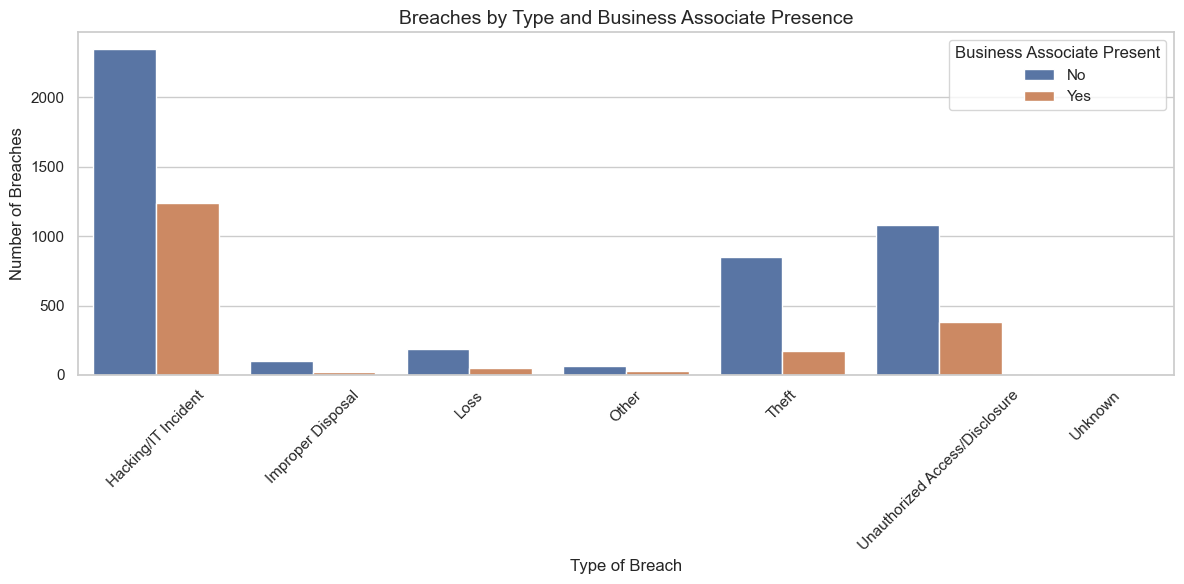

In [1871]:
# Group by Business Associate Presence and Type of Breach
breach_comparison = df_cleaned.groupby(['Business Associate Present', 'Type of Breach']).size().reset_index(name='Counts')

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(
    data=breach_comparison,
    x='Type of Breach',
    y='Counts',
    hue='Business Associate Present',
)
plt.title('Breaches by Type and Business Associate Presence', fontsize=14)
plt.xlabel('Type of Breach', fontsize=12)
plt.ylabel('Number of Breaches', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Business Associate Present')
plt.tight_layout()
plt.show()

# Summary

#### **Breach Types**
The majority of breaches (54.9%) are categorized as Hacking/IT Incidents followed by Unauthorized Access/Disclosure and Theft Less frequent breach types include Improper Disposal and Unknown. Hacking/IT Incidents not only dominate in frequency, but also have the highest impact in terms of individuals affected. Breach types like Theft and Improper Disposal tend to affect fewer individuals on average. When looking at specific categories based on individuals affected, those in the df1 (<1000 individuals) are impacted mainly by Theft and Improper Disposal while df6(>1,000,000 individuals) indicate that Hacking/IT Incidents mainly result in a larger number of individuals being impacted. We can conclude that Hacking/IT Incidents should be prioritized for cybersecurity interventions due to their significant frequency and impact. Other breach types, while less frequent, still require targeted mitigation strategies to address localized vulnerabilities.


#### **Geographic Distribution**
Certain states contribute significantly to breach frequency and the number of individuals affected. For example, California, Texas, and Florida have the highest number of breaches reported while, Minnesota and Indiana report fewer breaches but have some of the highest numbers of individuals affected. From this analysis, states with a high volume of breaches (like California) should allocate more resources to cybersecurity infrastructure. States like Minnesota require investigation into the high-impact breaches, despite their lower frequency.


#### **Entity Types**
Healthcare providers are the most frequently breached entity type, representing 71.7% of all incidents, emphasizing the sensitivity of healthcare data and its value to cybercriminals. However, breaches involving Business Associates (usually third party vendors or partners) impact the highest number of individuals on average. Healthcare providers report more breaches overall, but business associates tend to have a higher impact per breach. Health plans, while less common, also show significant impacts in certain cases. Therefore, it is recommended to enhance security measures for healthcare providers and ensure stricter data-sharing practices with business associates.


#### **Locations of Breached Information**
The majority of breaches occur in Network Servers (40% of incidents), which also account for the largest average and total numbers of individuals affected. Portable devices and electronic medical records are also linked to high-impact breaches, particular in larger breach categories. Emails which are frequently targeted and pose significant vulnerabilities. Lastly, Paper/Films related breaches are associated with smaller breaches but remain a notable risk for physical data theft. Overall, it is evident that digital breach locations, particularly Network Servers, require the highest level of attention. Strengthening physical security for paper-based records is also necessary to mitigate smaller-scale breaches.


#### **Change Over Time**
The number of cybersecurity breaches has increased significantly over the past decade, with a sharp spike in recent years starting around 2020. This trend suggests either an increase in the frequency and sophistication of cyberattacks, or improved reporting and detection mechanisms. Breaches involving Hacking/IT Incidents show the most significant growth year over year. This trend underscores the growing importance of cybersecurity measures to address evolving threats. Increased reporting and regulatory oversight may also contribute to the rise in reported incidents. While the analysis does not reveal clear seasonal patterns, certain years (e.g., 2020) exhibit significant increases in breach frequency, likely reflecting external factors such as the COVID-19 pandemic and increased reliance on digital infrastructure.


#### **Statistical Analysis**
Several statistical tests were conducted to identify relationships between breach variables:
- ANOVA: There is a significant difference in the number of individuals affected across breach types and breach locations.
- Pearson Correlation: A moderate positive correlation exists between breach type and the number of individuals affected, particularly for digital breaches.
- Chi-Square Test: A significant association was found between breach size categories and breach types.
These results highlight the need for tailored security measures based on breach type and location.


#### **Conclusion and Recommendations**
1. Prioritize Digital Security: Enhance protection for network servers and email systems to address high-impact digital breaches.
2. Geographic Targeting: Focus cybersecurity resources on high-frequency states like California, while addressing high-impact breaches in Minnesota and Indiana.
3. Entity-Specific Policies: Strengthen security for healthcare providers and introduce stricter compliance requirements for business associates.
4. Trend Monitoring: Implement proactive measures to address the increasing prevalence of Hacking/IT Incidents over time.
5. Physical Security: Improve safeguards for paper/films and physical records to reduce small-scale breaches.